In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Data Understanding

In [3]:
df = pd.read_csv('withoutNull.csv')
df.head()

player1Height  player2Height player1Hand player2Hand player1Backhand  \
0            185            185       Right       Right         Unknown   
1            180            178       Right       Right         Unknown   
2            188            180       Right       Right         Unknown   
3            188            193       Right       Right         Unknown   
4            188            191       Right       Right         Unknown   

  player2Backhand player1Continent player2Continent  player1Age  player2Age  \
0         Unknown    South America          Oceania        21.0        23.0   
1         Unknown           Europe             Asia        22.0        33.0   
2         Unknown           Europe    South America        23.0        21.0   
3         Unknown           Europe           Europe        23.0        22.0   
4         Unknown           Europe           Europe        23.0        18.0   

   player1Rank  player2Rank       GameRound tournament ground  Sets  BestOf  \
0          242          123     Round of 32   Salzburg   Clay     3       3   
1          193          387     Round of 32   Salzburg   Clay     3       3   
2          165          185     Semi-Finals   Salzburg   Clay     2       3   
3          165          180     Round of 32   Salzburg   Clay     3       3   
4          165          178  Quarter-Finals   Salzburg   Clay     2       3   

   days  Season  prize  
0     6  Spring  75000  
1     6  Spring  75000  
2     6  Spring  75000  
3     6  Spring  75000  
4     6  Spring  75000

In [4]:
round(df.describe(), 1)

player1Height  player2Height  player1Age  player2Age  player1Rank  \
count         5250.0         5250.0      4975.0      4997.0       5250.0   
mean           184.9          184.6        24.2        24.0        229.5   
std              6.6            6.5         3.9         4.0        276.7   
min            163.0          168.0        16.0        15.0          1.0   
25%            180.0          180.0        21.0        21.0         52.0   
50%            185.0          185.0        24.0        24.0        118.0   
75%            188.0          188.0        26.0        27.0        312.0   
max            211.0          211.0        54.0        50.0       1992.0   

       player2Rank    Sets  BestOf    days      prize  
count       5250.0  5250.0  5250.0  5250.0     5250.0  
mean         303.7     2.3     3.0     6.0   357600.1  
std          355.1     0.5     0.2     1.2   447421.8  
min            1.0     2.0     3.0     0.0    10000.0  
25%           75.0     2.0     3.0     6.0    25000.0  
50%          154.0     2.0     3.0     6.0   280000.0  
75%          404.0     3.0     3.0     6.0   500000.0  
max         2233.0     5.0     5.0    20.0  2296490.0

- **Height:** Está tudo bem ao meu ver;
- **Height:** Varia entre os 15 e os 54 anos de idade, a maior frequência é de jogadores entre os 21 e 17 anos de idade;
- **Rank:** é uma variável ordinal, ao que tudo indica acaba surgindo alguma disparidade nos ranks apartir de um determinado momento para os dois jogadores, até 75% do dados os ranks estão nos tops 300 e 400 e no final acabam tendo uma máxima de 2000, isto poderá acabar sendo visto como outlier;
- **Sets:** a maior parte dos jogos foram realizados em apenas 2 sets, até 75% dos dados eram apenas jogos com no máximo 3 sets surgindo mais sets depois deste percentual;
- **BestOf:** A maioria absoluta dos jogos é a melhor de 5;
- **days:** Em geral os torneios que temos na base de dados são realizados em apenas uma semana, temos uma máxima de 3 semanas para a concretização da final de um torneio;
- **prize:** Esta variável demonstra ter alguma variabilidade (o que pode ser verificado olhando para o seu desvio-padrão elevado = `447342.1`) e com extremos que indicando a possibilidade de existirem outliers, isto mais pelo extremo superior. O primeiro quartil encontra-se na casa das dezenas dos milhares, já o segundo quartil já é possível vê-lo na casa das centenas e isso se alatra ainda no último quartil. O valor máximo observado foi de 2M, o que é estranho de se ver dada a distribuição que a variável apontava ter.

In [6]:
df.tournament.value_counts()

Kitzbuhel              1430
Vienna                 1213
Graz                    447
St. Polten              323
Salzburg                209
Austria F2              186
Austria F1              153
Austria F3              143
Austria F4              119
Portschach              111
Austria F6              106
Austria F5              103
Annenheim                83
Austria F7               73
Nettingsdorf             72
Austria F8               62
Linz                     44
Ischgl                   42
Tulln                    41
Salzburg-Anif            38
Austria F9               37
Austria F10              32
M25 Vagau                27
M15 Anif                 25
Bruck                    24
M25 Kottingbrunn         22
M25 Vogau                19
M15 Bad Waltersdorf      17
M25 Telfs                15
Loipersdorf              13
M15 Warmbad-Villach       9
Italy F12                 5
Italy F25                 3
M15 Telfs                 2
Austria F11               1
Zell Am See         

- Foram verificados dois torneios que não faziam parte da lista de torneios realizados na Austria, procedeu-se a eliminação do mesmo.
- Passo não muito relevante, mas, verificou-se um torneio que o nome pode ter sido mal registado, trocou-se um artigo por outro, procedeu-se apenas a atualização deste.

In [8]:
df = df.loc[(df['tournament'] != 'Italy F12') | (df['tournament'] != 'Italy F25')]
df.loc[df['tournament'] == 'M25 Vagau', 'tournament'] = 'M25 Vogau'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250 entries, 0 to 5249
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player1Height     5250 non-null   int64  
 1   player2Height     5250 non-null   int64  
 2   player1Hand       5250 non-null   object 
 3   player2Hand       5250 non-null   object 
 4   player1Backhand   5250 non-null   object 
 5   player2Backhand   5250 non-null   object 
 6   player1Continent  5250 non-null   object 
 7   player2Continent  5250 non-null   object 
 8   player1Age        4975 non-null   float64
 9   player2Age        4997 non-null   float64
 10  player1Rank       5250 non-null   int64  
 11  player2Rank       5250 non-null   int64  
 12  GameRound         5250 non-null   object 
 13  tournament        5250 non-null   object 
 14  ground            5250 non-null   object 
 15  Sets              5250 non-null   int64  
 16  BestOf            5250 non-null   int64  


In [10]:
numCols = df.columns[[0, 1, 8, 9, 10, 11, 19]]
catCols = df.columns[[2, 3, 4, 5, 6, 7, 12, 14, 16, 18, 15]]

Procedeu-se a criação de uma função para dinamizar o processo de visualização das classes que cada uma das variáveis categóricas presente na base de dados tem e número de observações com cada uma delas.

In [12]:
def value_counts(data):
    print("-" * 40)
    for col in data.columns:
        values = data[col].value_counts()
        print(f"Coluna: {col} | Quant. {len(values)}")
        print("-" * 40)
        print(values)
        print("-" * 40)

In [13]:
value_counts(df[catCols])

----------------------------------------
Coluna: player1Hand | Quant. 3
----------------------------------------
Right      4353
Left        895
Unknown       2
Name: player1Hand, dtype: int64
----------------------------------------
Coluna: player2Hand | Quant. 3
----------------------------------------
Right      4347
Left        899
Unknown       4
Name: player2Hand, dtype: int64
----------------------------------------
Coluna: player1Backhand | Quant. 3
----------------------------------------
Two        2252
Unknown    1945
One        1053
Name: player1Backhand, dtype: int64
----------------------------------------
Coluna: player2Backhand | Quant. 3
----------------------------------------
Unknown    2226
Two        2045
One         979
Name: player2Backhand, dtype: int64
----------------------------------------
Coluna: player1Continent | Quant. 6
----------------------------------------
Europe           4249
South America     600
North America     180
Oceania           108
Asia  

- **Hand:** A maior parte dos jogadores têm a direita como a mão favorita. Existem apenas dois registos onde o jogador tem a sua mão favorita é desconhecida para o `Player1` e 4 para o `Player2` o que indica que se calhar podemos eliminar os registos neste estado ou aplicarmo a moda;
- **BackHand:** Um pouco diferente do caso anterior, há muitos mais Unknowns verificados nesta variável, para o `Player2` verifica-se até que o caso mais comum, mas, em geral é possível ver que o mais comum para os jogadores é ter o `BackHand` como **Two-Handed**;
- **Continente:** O continente Europeu é o continente dominante na base de dados demosntrando um enorme desbalanceamento nesta variável para os dois jogadores, o que coloca em causa a utilidade desta variável para a previsão do número de sets a serem jogados;
- **GameRound:** não acho que haja muito que se diga sobre esta variável, tem muitas classes, se calhar podia ser reduzido o número;
- **Ground:** a maior parte dos jogos da Austria, segundo a amostra que temos, são realizado em pisos `Clay` e é muito raro serem realizados em pisos `Grass`.
- **Season:** os jogos são mais realizados em época de verão e em seguida a primavera, épocas menos frias do ano. A época que menos se realizam jogos é o inverno.

In [15]:
# Definir a ordem desejada manualmente
ordem_desejada = [
    '1st Round Qualifying', '2nd Round Qualifying', '3rd Round Qualifying',
    'Round of 64', 'Round of 32', 'Round of 16', 'Quarter-Finals', 'Semi-Finals', 'Finals'
]

# Transformar a coluna em tipo categórico ordenado
df['GameRound'] = pd.Categorical(df['GameRound'], categories=ordem_desejada, ordered=True)

# Agora, ao plotar, pandas/matplotlib respeitará a ordem!


# 2. Exploratory Data Analisys

## 2.1. Univariate Analisys

### 2.1.1 Categorical Variable

In [19]:
%%capture
fig, axes = plt.subplots(figsize=(22, 26), nrows=len(catCols), ncols=2, dpi=500)

In [20]:
for i in range(len(catCols)):
    values = df[catCols[i]].value_counts().values
    keys = df[catCols[i]].value_counts().keys()
    explodes = [0.05 for i in range(len(keys))]
    if len(keys) > 3:
        wedges, texts = axes[i][0].pie(values, explode=explodes,
                                  textprops=dict(color="k"))
        perc = (values / values.sum()) * 100
        legenda = [f"{keys[i]} {perc[i]:.1f}%" for i in range(len(values))]
        axes[i][0].legend(wedges, legenda,
                  title=f"{catCols[i]}",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))
    else:
        axes[i][0].pie(x=values, labels=keys, autopct='%1.1f%%', explode=explodes)
    axes[i][0].set_title(catCols[i])
    
    ax = sns.countplot(y=catCols[i], data=df, orient='h', ax=axes[i][1])
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=5)

    max_count = values.max()
    axes[i][1].set_xlim(0, max_count * 1.1)

fig

Será que mantendo só os registos dos jogos realizados em torneios com duração de 6 dias não nos ajudará a criar alguma consistência dos dados no que diz respeito a variável alvo?

Após as visualizações anteriores, foram tomadas as seguintes decisões:
- Eliminar os registos de jogos que são a melhor de 5 por conta da subrepresentatividade destes tipos de jogos;
- A Eliminação dos registos onde a hand de qualquer um dos jogadores está registadas como desconhecida (missing value) muito pelo facto de representarem uma porção minimalista do conjunto de dados que temos;
- Eliminar as colunas `BestOf` (ficaria apenas com uma classe com a eliminação dos jogos que são a melhor de 5) e `days` (Há uma sobrerepresentação dos jogos realizados em torneios com a duração de 6 dias, não se viu a necessidade de eliminar os registos porque não se verificaram motivos para considerar que a duração do torneio possa influenciar no número de sets de um jogo).

In [23]:
df2 = df.copy()
df = df.loc[df['BestOf'] != 5]
df = df.loc[(df['player1Hand'] != 'Unknown') & (df['player2Hand'] != 'Unknown')]
df = df.drop(['BestOf', 'days'], axis=1)

In [24]:
catCols

Index(['player1Hand', 'player2Hand', 'player1Backhand', 'player2Backhand',
       'player1Continent', 'player2Continent', 'GameRound', 'ground', 'BestOf',
       'Season', 'Sets'],
      dtype='object')

Uma visualização da distribuição da variável alvo com a eliminação dos registos referentes a jogos que são a melhor de 5.

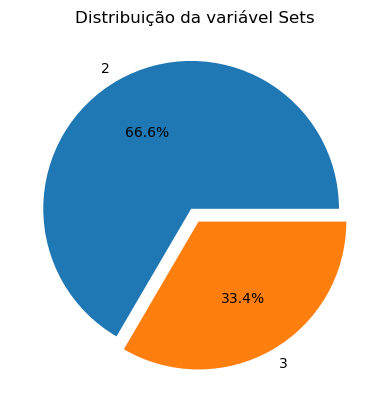

In [26]:
values = df[catCols[-1]].value_counts().values
keys = df[catCols[-1]].value_counts().keys()
explodes = [0.05 for i in range(len(keys))]

plt.pie(x=values, labels=keys, autopct='%1.1f%%', explode=explodes)
plt.title("Distribuição da variável Sets")
plt.show()

### 2.1.2 Numerical Variable

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5206 entries, 0 to 5249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   player1Height     5206 non-null   int64   
 1   player2Height     5206 non-null   int64   
 2   player1Hand       5206 non-null   object  
 3   player2Hand       5206 non-null   object  
 4   player1Backhand   5206 non-null   object  
 5   player2Backhand   5206 non-null   object  
 6   player1Continent  5206 non-null   object  
 7   player2Continent  5206 non-null   object  
 8   player1Age        4931 non-null   float64 
 9   player2Age        4953 non-null   float64 
 10  player1Rank       5206 non-null   int64   
 11  player2Rank       5206 non-null   int64   
 12  GameRound         5206 non-null   category
 13  tournament        5206 non-null   object  
 14  ground            5206 non-null   object  
 15  Sets              5206 non-null   int64   
 16  Season            5206 n

In [29]:
round(df.describe(), 2)

player1Height  player2Height  player1Age  player2Age  player1Rank  \
count        5206.00        5206.00     4931.00     4953.00      5206.00   
mean          184.87         184.64       24.15       24.01       230.60   
std             6.64           6.50        3.90        4.01       276.27   
min           163.00         168.00       16.00       15.00         1.00   
25%           180.00         180.00       21.00       21.00        53.00   
50%           185.00         185.00       24.00       24.00       119.00   
75%           188.00         188.00       26.00       27.00       314.75   
max           211.00         211.00       54.00       50.00      1992.00   

       player2Rank     Sets       prize  
count      5206.00  5206.00     5206.00  
mean        305.36     2.33   357199.09  
std         355.30     0.47   448672.73  
min           1.00     2.00    10000.00  
25%          76.00     2.00    25000.00  
50%         155.00     2.00   280000.00  
75%         406.75     3.00   500000.00  
max        2233.00     3.00  2296490.00

In [30]:
df.head()

player1Height  player2Height player1Hand player2Hand player1Backhand  \
0            185            185       Right       Right         Unknown   
1            180            178       Right       Right         Unknown   
2            188            180       Right       Right         Unknown   
3            188            193       Right       Right         Unknown   
4            188            191       Right       Right         Unknown   

  player2Backhand player1Continent player2Continent  player1Age  player2Age  \
0         Unknown    South America          Oceania        21.0        23.0   
1         Unknown           Europe             Asia        22.0        33.0   
2         Unknown           Europe    South America        23.0        21.0   
3         Unknown           Europe           Europe        23.0        22.0   
4         Unknown           Europe           Europe        23.0        18.0   

   player1Rank  player2Rank       GameRound tournament ground  Sets  Season  \
0          242          123     Round of 32   Salzburg   Clay     3  Spring   
1          193          387     Round of 32   Salzburg   Clay     3  Spring   
2          165          185     Semi-Finals   Salzburg   Clay     2  Spring   
3          165          180     Round of 32   Salzburg   Clay     3  Spring   
4          165          178  Quarter-Finals   Salzburg   Clay     2  Spring   

   prize  
0  75000  
1  75000  
2  75000  
3  75000  
4  75000

Houve a necessidade de se verificar a possibilidade de existência de missing values nas variáveis referentes a idade e proceder-se a imputação do valor zero para que fosse possível realizar a visualização gráfica da mesma.

In [32]:
df['player1Age'].isnull().sum()# fillna(0)

275

In [33]:
df.shape[0]

5206

In [34]:
print(f'Inicialmente haviam {df.shape[0]} registos.')
df['player1Age'] = df['player1Age'].fillna(0)
print(f'Com a eliminação dos registos com idades nulas em player 1 ficamos com {df.shape[0]} registos.')
df['player2Age'] = df['player2Age'].fillna(0)
print(f'Com a eliminação dos registos com idades nulas em player 2 ficamos com {df.shape[0]} registos.')

Inicialmente haviam 5206 registos.
Com a eliminação dos registos com idades nulas em player 1 ficamos com 5206 registos.
Com a eliminação dos registos com idades nulas em player 2 ficamos com 5206 registos.


In [35]:
%%capture
fig, axes = plt.subplots(figsize=(12, 24), nrows=len(numCols), ncols=2, dpi=300)

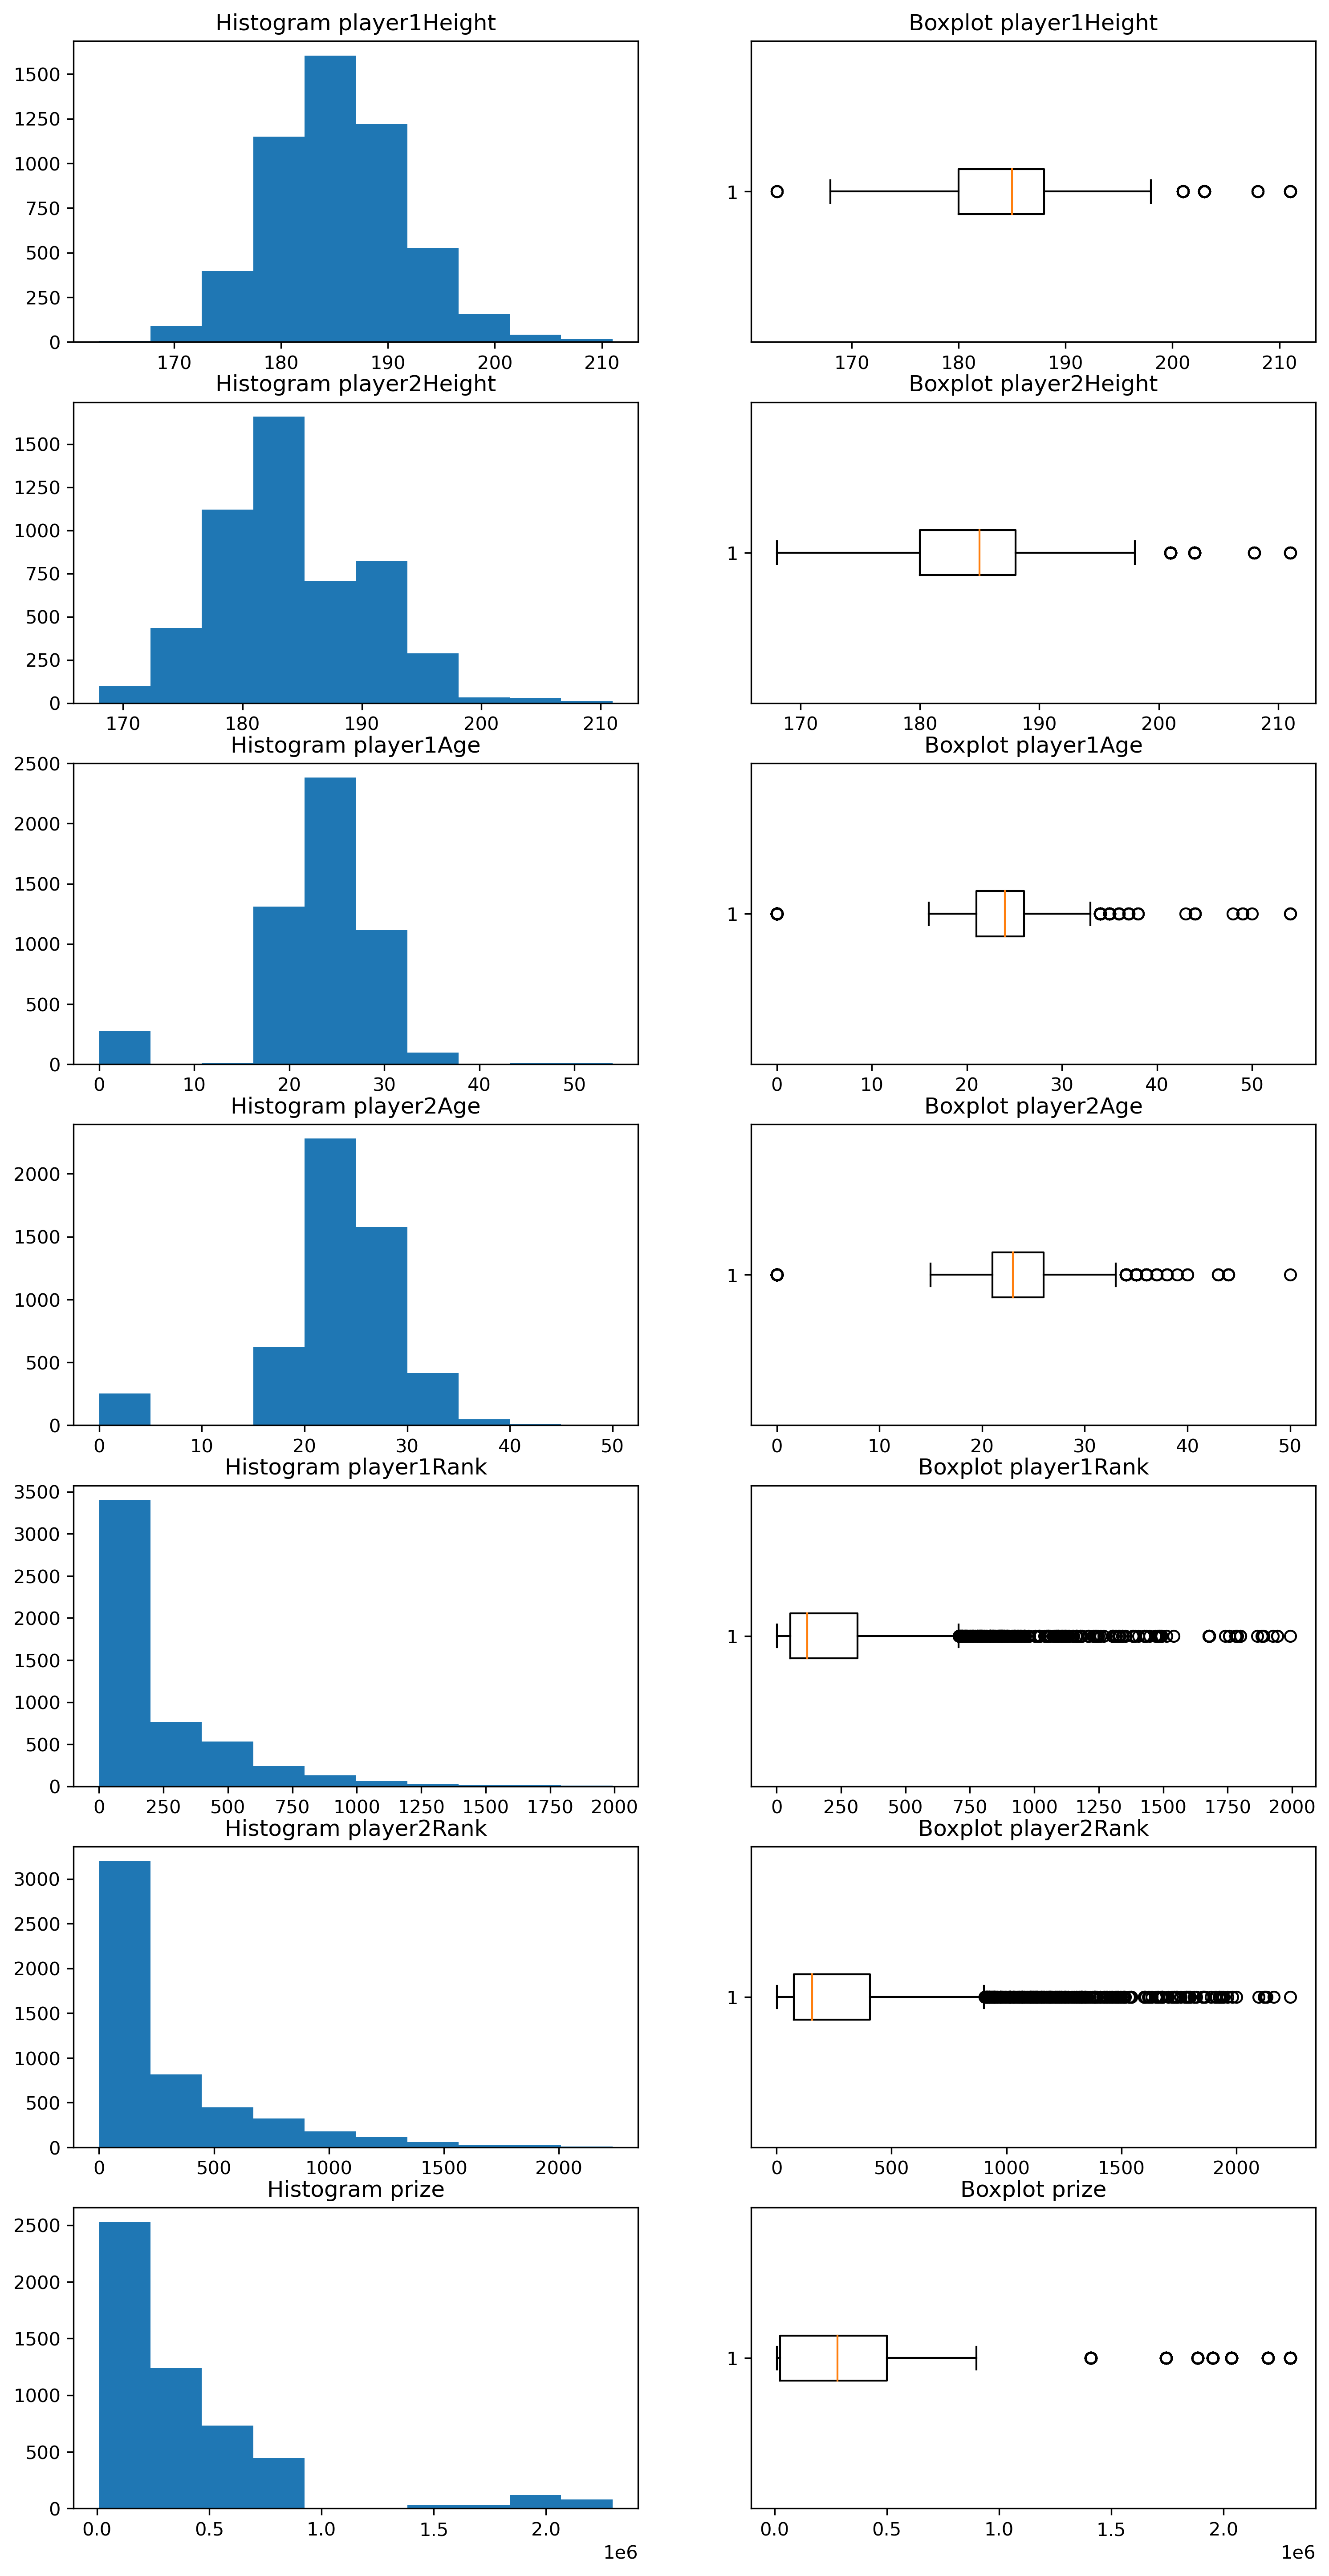

In [36]:
for i in range(len(numCols)):
    # sns.histplot(x=numCols[i], ax=axes[i][0], data=df)
    axes[i][0].hist(df[numCols[i]])
    axes[i][0].set_title(f'Histogram {numCols[i]}')
    axes[i][1].boxplot(x=df[numCols[i]], vert=False)
    axes[i][1].set_title(f'Boxplot {numCols[i]}')
fig

## 2.2. Bivariate Analisys

In [38]:
from scipy.stats import chi2_contingency

### 2.2.1 Categórica vs Categórica

In [40]:
catCols

Index(['player1Hand', 'player2Hand', 'player1Backhand', 'player2Backhand',
       'player1Continent', 'player2Continent', 'GameRound', 'ground', 'BestOf',
       'Season', 'Sets'],
      dtype='object')

Tendo em conta que já foram eliminadas algumas variáveis categóricas, houve a necessidade de se garantir que elas fossem também eliminadas da variável com os nomes das colunas categóricas.

In [42]:
catCols = catCols[0:8].tolist() + catCols[9:].tolist()
catCols

['player1Hand',
 'player2Hand',
 'player1Backhand',
 'player2Backhand',
 'player1Continent',
 'player2Continent',
 'GameRound',
 'ground',
 'Season',
 'Sets']

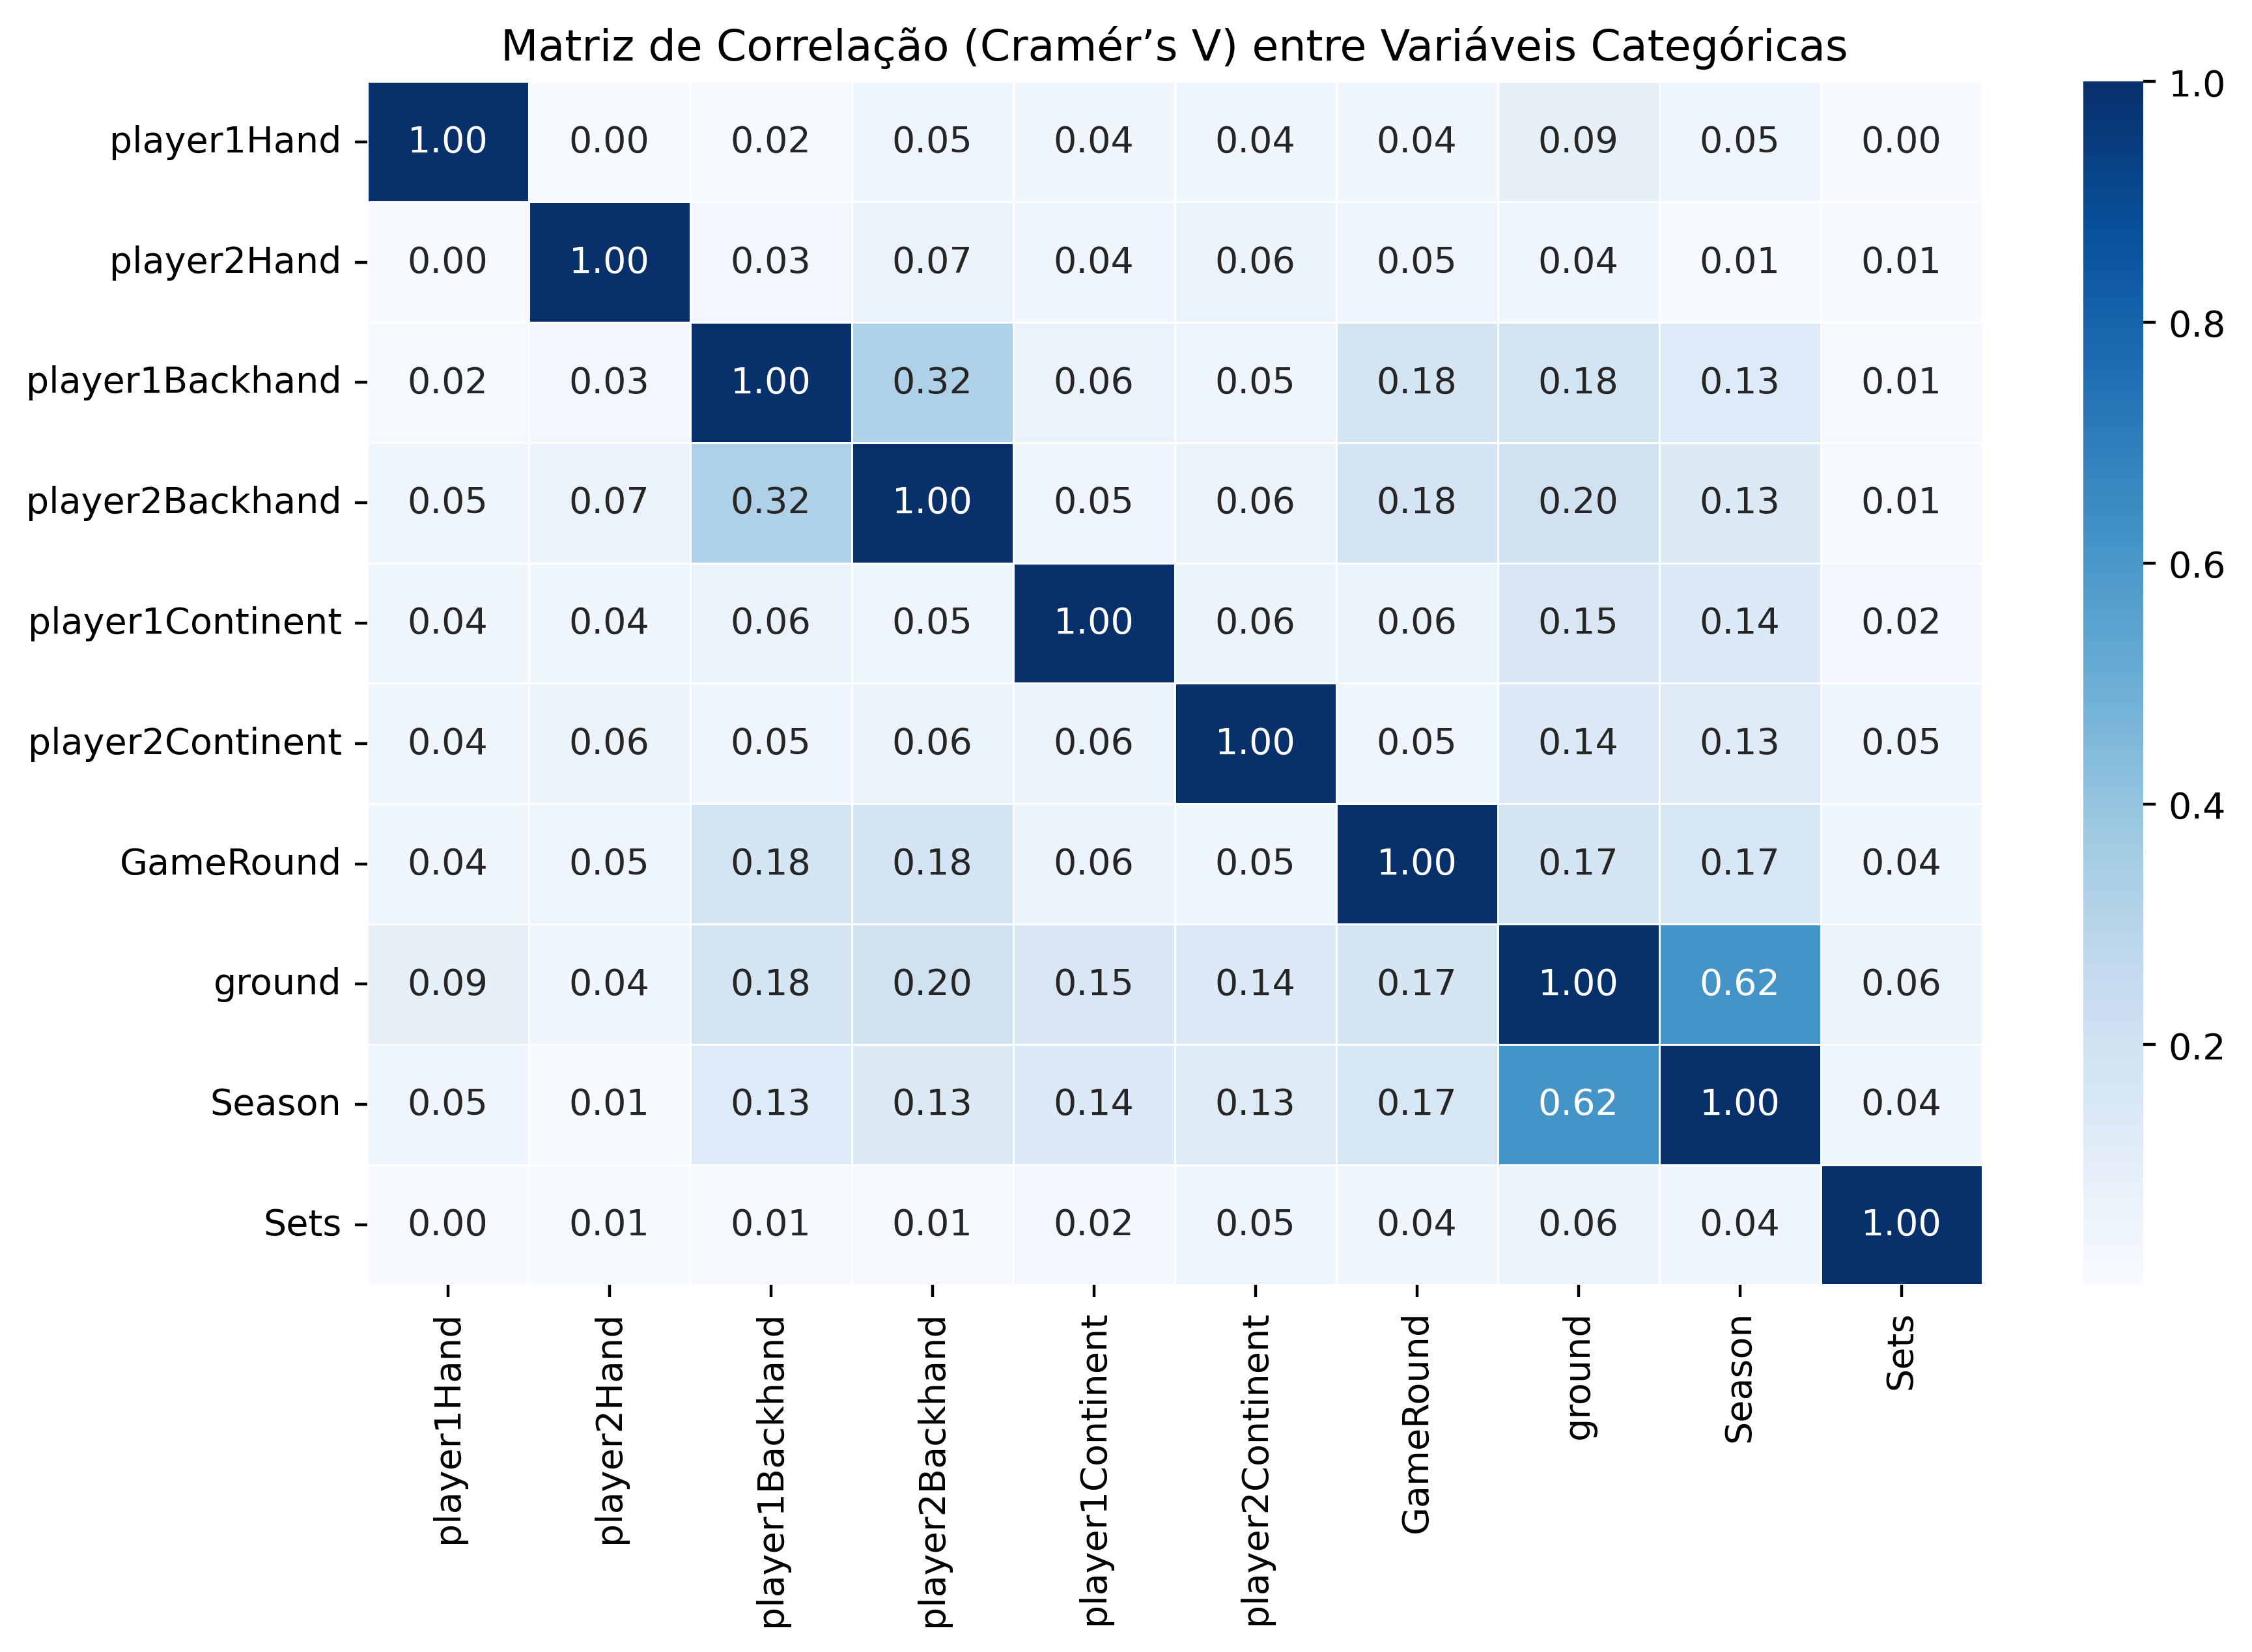

In [43]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Criar matriz de correlação para as variáveis categóricas redundantes
correlation_matrix = pd.DataFrame(index=catCols, columns=catCols)

for var1 in catCols:
    for var2 in catCols:
        if var1 == var2:
            correlation_matrix.loc[var1, var2] = 1.0
        else:
            correlation_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])

# Converter para float para evitar problemas com Seaborn
correlation_matrix = correlation_matrix.astype(float)

# Plotar heatmap de correlação categórica
plt.figure(figsize=(10, 6), dpi=400)
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação (Cramér’s V) entre Variáveis Categóricas")
plt.show()

In [44]:
correlation_matrix['Sets'].drop('Sets', axis=0)

player1Hand         0.000404
player2Hand         0.010855
player1Backhand     0.014344
player2Backhand     0.012452
player1Continent    0.021883
player2Continent    0.048041
GameRound           0.042642
ground              0.058544
Season              0.037975
Name: Sets, dtype: float64

In [45]:
cramers_v(df['tournament'], df['Sets'])

0.08902600042949739

Analisando pela matriz de correlação **V de Crammer**, as correlações entre preditores categóricos é muito fraca, ainda assim é possível verificar algumas relações que se destacam.

Podemos verificar que as `backhands` dos jogadores têm alguma relação entre si, as mais fortes vistas neste mapa. Estas mesmas variáveis têm alguma correlação com o `GameRound` e o `Ground` dos jogos.

Uma correlação semelhante também se pode verificar entre o `Round` e o `Ground`.

Um outra correlação que não se deixa ficar de lado é a dos continentes de nascimento dos jogadores com o `Ground` onde estes se enfretam.

Quanto a relação com a **variável alvo**, verifica-se que os preditores são muito fracos, com correlações muito inferiores a **0.1** mas, que ainda assim podemos fazer comparações. Vemos por exemplo que a `Hand` e o `Continente` do jogador 2 têm alguma relação diferenciada com a variável alvo, em geral, estes casos dizem referência aos jogadores que acabaram perdendo o jogo.

Uma variável que também demonstra ter uma relação ligeiramente diferenciada com a alvo é o `Ground` onde o jogo é feito

In [47]:
%%capture
fig, axes = plt.subplots(figsize=(10, 32), nrows=5, ncols=2, dpi=300)

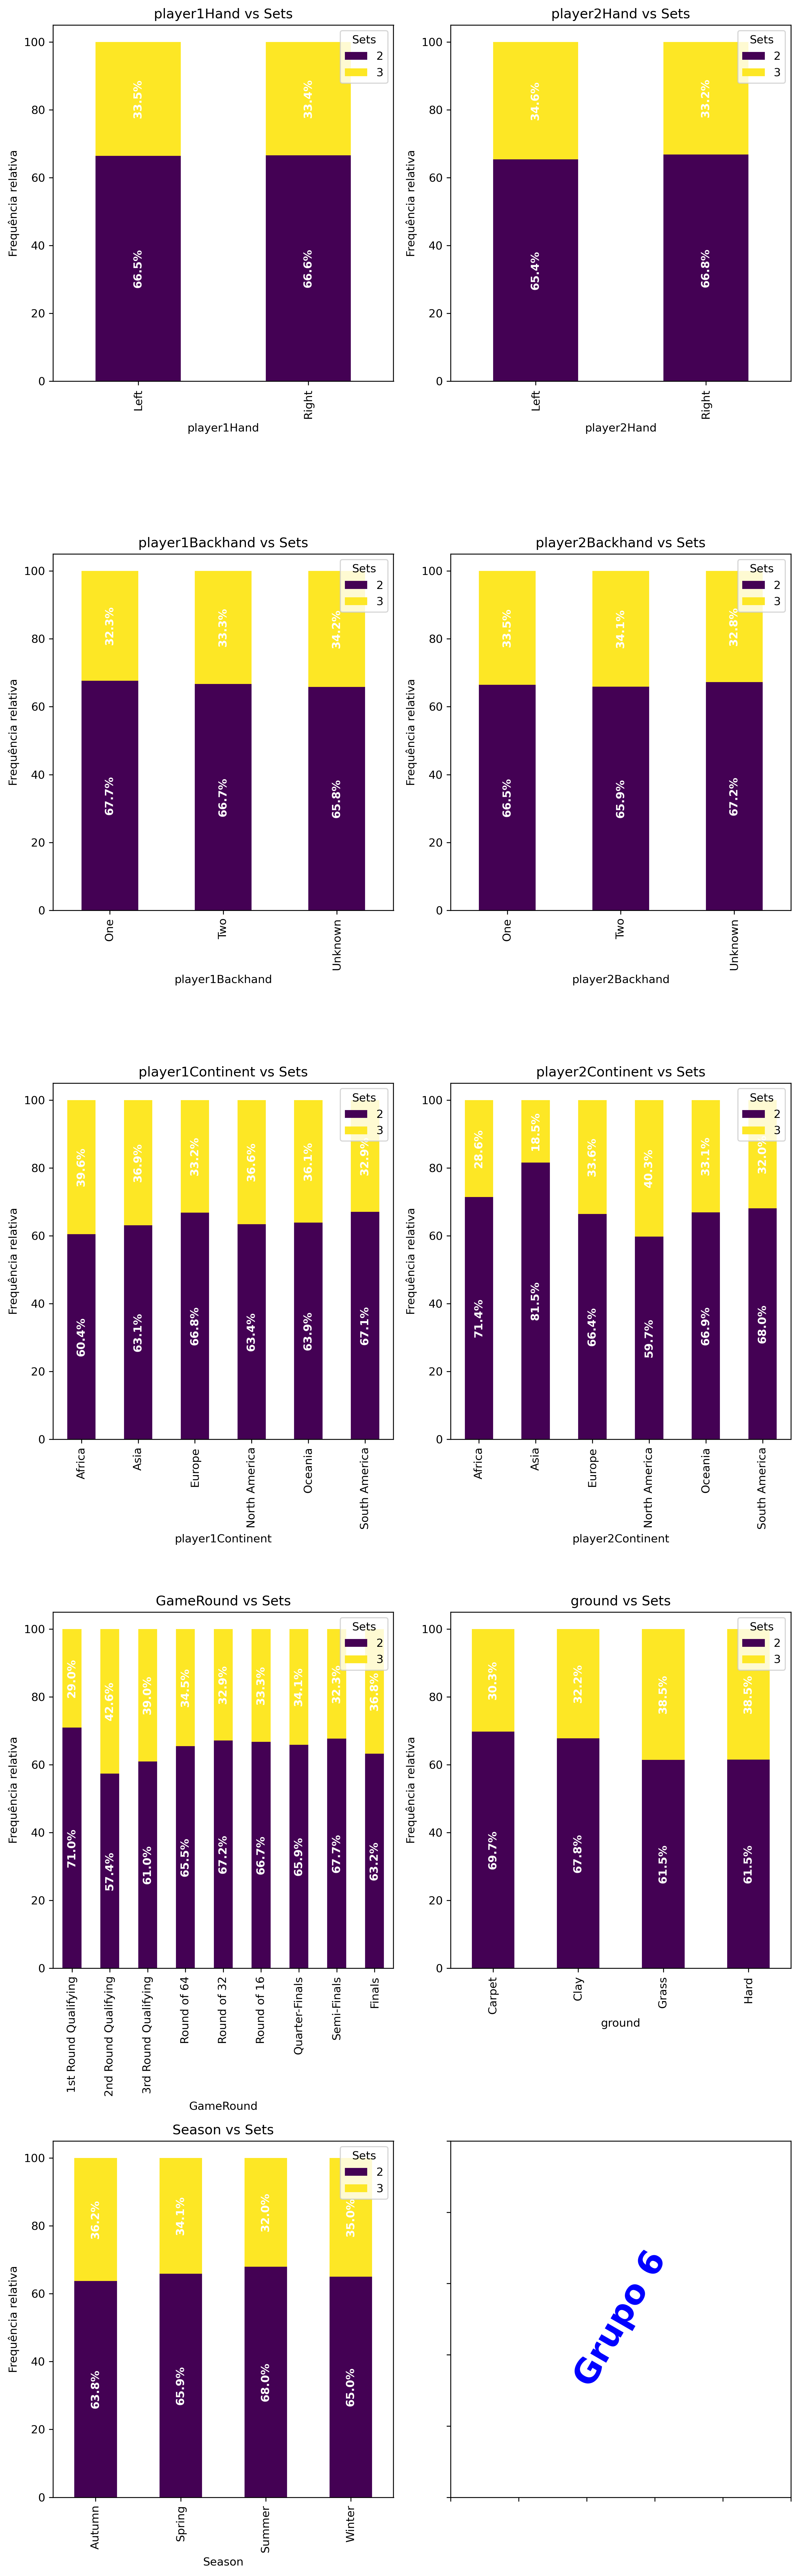

In [48]:
axes = axes.reshape((10,))
for i in range(9):
    # Frequências relativas por Linha
    freq_table = round(pd.crosstab(df[catCols[i]], df[catCols[-1]], normalize='index') * 100, 2)
    
    ax = axes[i]
    bars = freq_table.plot(kind='bar', stacked=True, orientation='vertical', colormap='viridis', ax=ax)

    # Títulos e labels
    ax.set_title(f"{catCols[i]} vs {catCols[-1]}")
    ax.set_ylabel("Frequência relativa")
    ax.legend(title=catCols[-1], loc='upper right')

    # Percorre as barras empilhadas e coloca o valor da percentagem
    for bar_container in ax.containers:
        ax.bar_label(bar_container, fmt='%.1f%%', label_type='center', color='white', 
                     fontweight='bold', fontsize=10, rotation=90)

axes[9].text(0.5, 0.5, "Grupo 6", transform=axes[9].transAxes, rotation=60,
                ha='center', va='center', fontsize=30, color='blue', weight='bold')
axes[9].set_xticklabels([])
axes[9].set_yticklabels([])
fig.tight_layout()
fig

In [49]:
df.Sets.value_counts()

2    3466
3    1740
Name: Sets, dtype: int64

In [50]:
round(pd.crosstab(df.Season, df.Sets, normalize='index'), 2)

Sets       2     3
Season            
Autumn  0.64  0.36
Spring  0.66  0.34
Summer  0.68  0.32
Winter  0.65  0.35

In [51]:
round(pd.crosstab(df.GameRound, df.Sets, normalize='index'), 2)

Sets                     2     3
GameRound                       
1st Round Qualifying  0.71  0.29
2nd Round Qualifying  0.57  0.43
3rd Round Qualifying  0.61  0.39
Round of 64           0.65  0.35
Round of 32           0.67  0.33
Round of 16           0.67  0.33
Quarter-Finals        0.66  0.34
Semi-Finals           0.68  0.32
Finals                0.63  0.37

Dado que o resultado do jogo depende muito dos dois interveninetes de maneira dependente, se calhar faria mais sentido estudar as variáveis que dizem respeito a caraterística de cada um deles de maneira unida.

In [53]:
default = {'Left - Right':'Right - Left'}
hands = list()
for hand in (df['player1Hand'] + ' - ' + df['player2Hand']):
    if hand in default:
        hands.append('Right - Left')
    # elif hand == default[1]:
    #     hands.append('Right - Unknown')
    # elif hand == default[2]:
    #     hands.append('Left - Unknown')
    elif (hand.split(' - ')[0] == hand.split(' - ')[1]):
        hands.append(hand.split(' - ')[0])
    else:
        hands.append(hand)

pd.Series(hands).value_counts()

Right           3585
Right - Left    1466
Left             155
dtype: int64

**A ordem de confrontos mais realizados é a seguinte:**
1. Right-Handed
2. Right vs Left
3. Left-Handed

In [55]:
%%capture
def stackpieplot(column, name, target):
    fig, axes = plt.subplots(figsize=(11, 6), nrows=1, ncols=2)
    
    ref = pd.Series(column, name=name.capitalize())
    values = ref.value_counts().values
    keys = ref.value_counts().keys()

    axes[0].pie(values, labels=keys, autopct='%1.1f%%', pctdistance=0.8, wedgeprops=dict(width=0.5), startangle=-40)
    axes[0].set_title(f"{name.capitalize()}")
    axes[0].legend(values)
    
    round(pd.crosstab(ref, target, normalize='index') * 100).plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])
    axes[1].legend(
        title='Sets',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    axes[1].set_title(f"{name.capitalize()} vs Sets")

    for bar_container in axes[1].containers:
        axes[1].bar_label(bar_container, fmt='%.1f%%', label_type='center', color='white', 
                     fontweight='bold', fontsize=10, rotation=90)

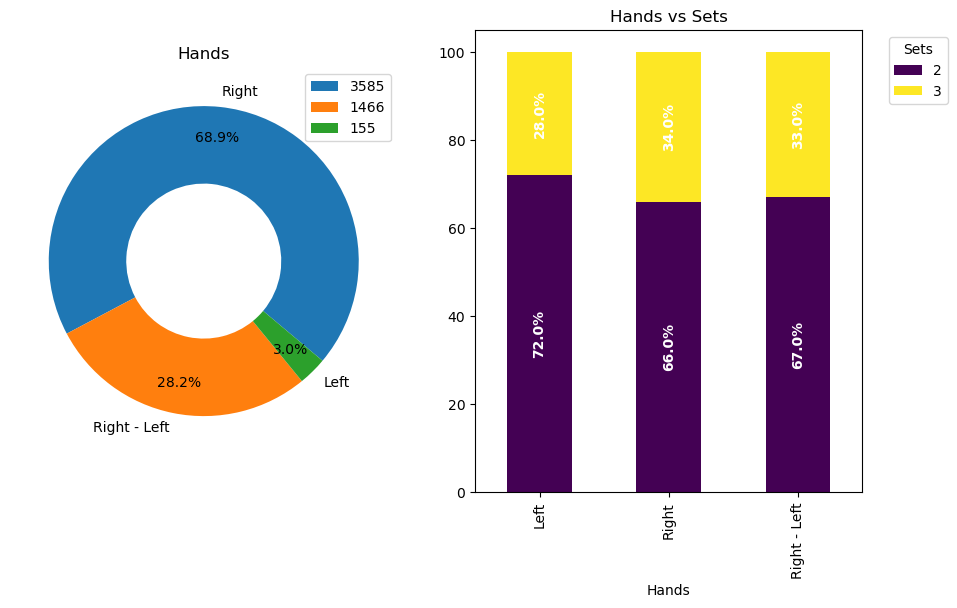

In [56]:
stackpieplot(hands, 'Hands', df['Sets'])

In [57]:
round(cramers_v(df[catCols[-1]], pd.Series(hands, name='Hands')), 5)

0.02279

Verifica-se alguma tendência, bem ligeira mesmo, do jogo ser resolvido em apenas dois sets quando os jogadores têm mãos favoritas diferentes.

A correlação parcimónica é maior do que a apresentada para player1 mas, inferior a apresentada para player2.

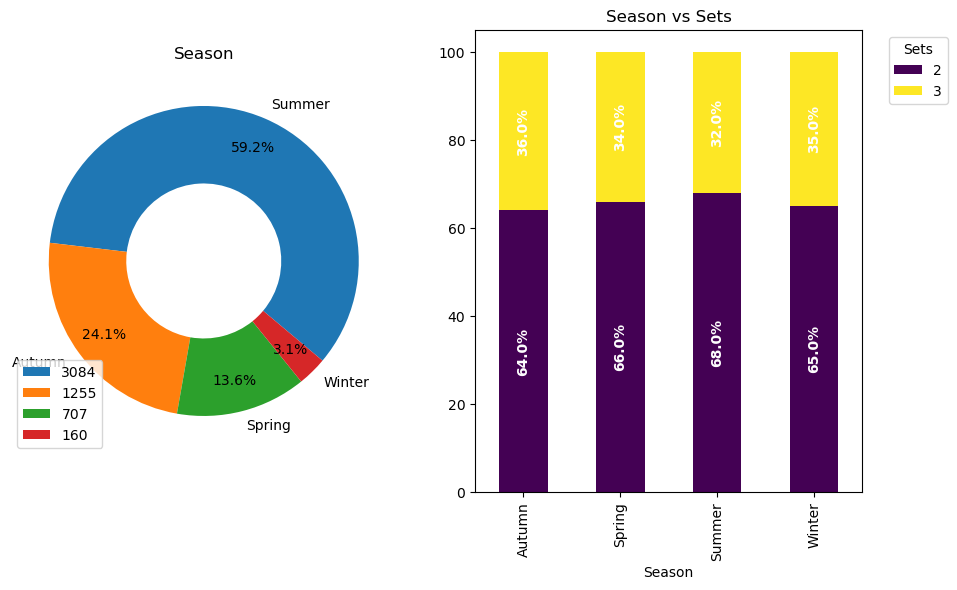

In [59]:
stackpieplot(df.Season, 'Season', df['Sets'])

In [60]:
default = ('Unknown - Two', 'Two - One', 'Unknown - One')
backhands = list()
for backhand in (df['player1Backhand'] + ' - ' + df['player2Backhand']):
    if backhand == default[0]:
        backhands.append('Two - Unknown')
    elif backhand == default[1]:
        backhands.append('One - Two')
    elif backhand == default[2]:
        backhands.append('One - Unknown')
    # elif (backhand.split(' - ')[0] == backhand.split(' - ')[1]) and (backhand.split(' - ')[0] != 'Unknown'):
    #     backhands.append('Same')
    else:
        backhands.append(backhand.split(' - ')[0])
 
pd.Series(backhands).value_counts()

Two              1750
Unknown          1352
One              1033
One - Two         495
Two - Unknown     333
One - Unknown     243
dtype: int64

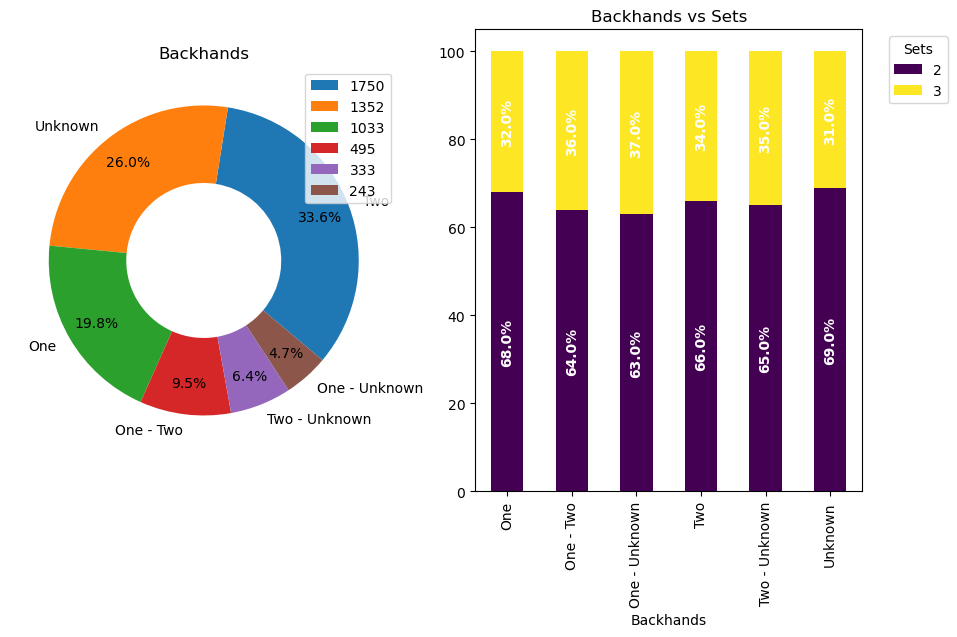

In [61]:
stackpieplot(backhands, 'backhands', df['Sets'])

(Unknown, Two - Unknown) = Two

One Unknown = One

In [63]:
round(cramers_v(df[catCols[-1]], pd.Series(backhands, name='Backhands')), 5)

0.0369

Por aqui não se verifica nenhuma tendência, mas, é possível verificar que existe uma diferença mínima nos registos relativos de backhands a `Same` para 3 ou 2 sets, estando a superioridade sobre os 3 sets, penalizando apenas a classe `Two - Unknown`.

Quanto a correlação parcimónica, ela é inferior aos dois casos.

In [65]:
default = {'South America - Europe':'Europe - South America', 
           'North America - Europe':'Europe - North America', 
           'Oceania - Europe':'Europe - Oceania',
           'Asia - Europe':'Europe - Asia',
           'Africa - Europe':'Europe - Africa',
           'GHOST-FLAG - Europe':'Europe - GHOST-FLAG',
           'South America - North America':'North America - South America',
           'Oceania - North America':'North America - Oceania',
           'Oceania - South America':'South America - Oceania',
           'Asia - South America':'South America - Asia',
           'Asia - North America': 'North America - Asia',
           'Africa - South America':'South America - Africa',
           'Africa - North America':'North America - Africa',
           'Oceania - Africa':'Africa - Oceania',
           'Oceania - Asia':'Asia - Oceania'
}
continents = list()
for continent in (df['player1Continent'] + ' - ' + df['player2Continent']):
    if continent in default:
        continents.append(default[continent])
    elif continent.split(' - ')[0] == continent.split(' - ')[1]:
        continents.append(continent.split(' - ')[0])
    else:
        continents.append(continent)

pd.Series(continents).value_counts()

Europe                           3457
Europe - South America            871
Europe - North America            269
Europe - Oceania                  181
Europe - Asia                     108
South America                     101
Europe - Africa                    74
North America - South America      38
North America                      22
North America - Oceania            19
South America - Oceania            19
South America - Asia               11
South America - Africa              8
North America - Africa              7
Africa - Oceania                    5
Oceania                             5
North America - Asia                4
Asia - Oceania                      4
Asia                                1
Africa                              1
Africa - Asia                       1
dtype: int64

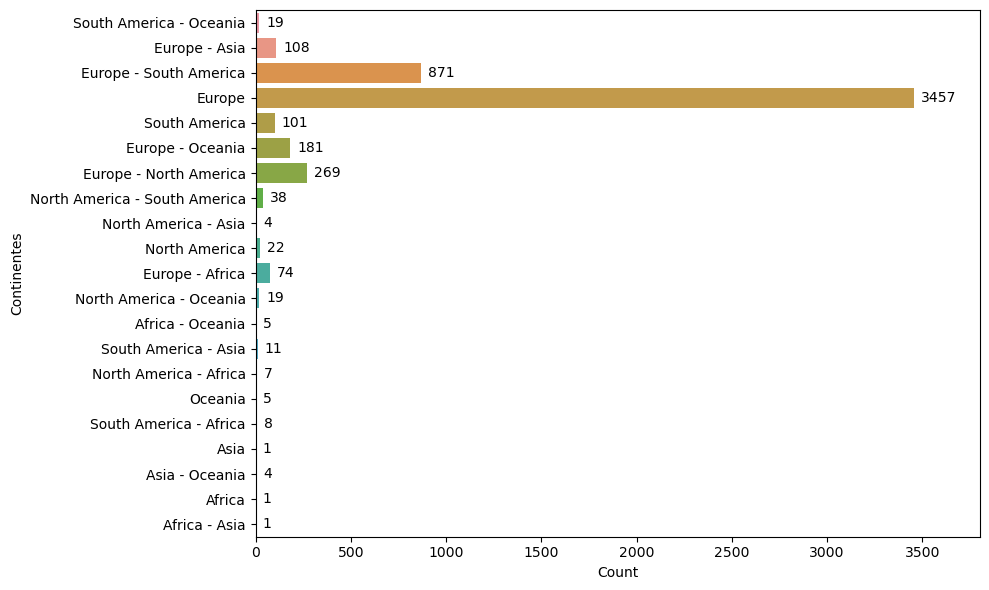

In [66]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y=continents, orient='v')

# Adiciona os valores no final de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5)

# Ajusta o limite do eixo x para dar espaço ao texto
max_count = pd.Series(continents).value_counts().max()
plt.xlim(0, max_count * 1.1)

plt.xlabel("Count")
plt.ylabel("Continentes")
# plt.title('Continentes de Nascimento')

plt.tight_layout()
plt.show()

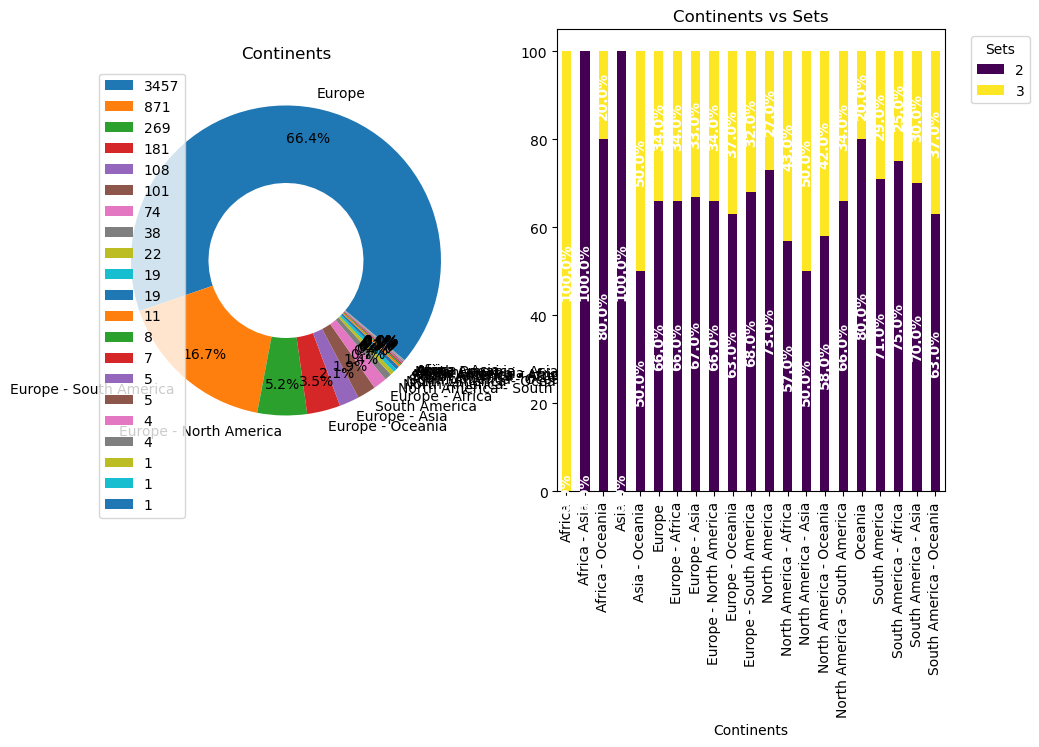

In [67]:
stackpieplot(continents, 'continents', df['Sets'])

O número de classes condiciona a forma de visualização. A mesma foi mantida apenas para demonstrar que foram feitos testes de visulizações.

In [69]:
round(cramers_v(df[catCols[-1]], pd.Series(continents, name='Continents')), 5)

0.04385

In [70]:
round(pd.crosstab(pd.Series(continents, name='Continents'), df[catCols[-1]], normalize='index'), 2)

Sets                              2     3
Continents                               
Africa                         0.00  1.00
Africa - Asia                  1.00  0.00
Africa - Oceania               0.80  0.20
Asia                           1.00  0.00
Asia - Oceania                 0.50  0.50
Europe                         0.66  0.34
Europe - Africa                0.66  0.34
Europe - Asia                  0.67  0.33
Europe - North America         0.66  0.34
Europe - Oceania               0.63  0.37
Europe - South America         0.68  0.32
North America                  0.73  0.27
North America - Africa         0.57  0.43
North America - Asia           0.50  0.50
North America - Oceania        0.58  0.42
North America - South America  0.66  0.34
Oceania                        0.80  0.20
South America                  0.71  0.29
South America - Africa         0.75  0.25
South America - Asia           0.70  0.30
South America - Oceania        0.63  0.37

### 2.2.2 Categórica vs Numérica

In [72]:
catCols

['player1Hand',
 'player2Hand',
 'player1Backhand',
 'player2Backhand',
 'player1Continent',
 'player2Continent',
 'GameRound',
 'ground',
 'Season',
 'Sets']

In [73]:
from scipy import stats

Coeficientes ETA:
        Variável  Coeficiente ETA
0  player1Height         0.022566
1  player2Height         0.027548
2     player1Age         0.002123
3     player2Age         0.022959
4    player1Rank         0.007220
5    player2Rank         0.074004
6          prize         0.035178


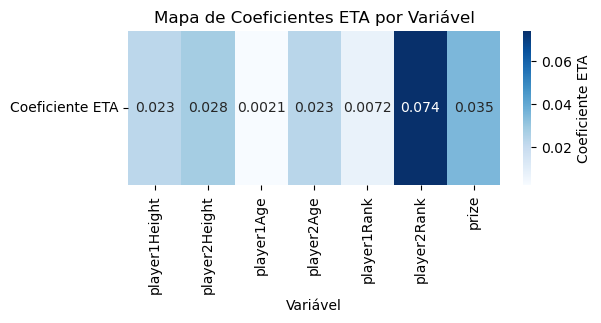

In [74]:
def calculate_eta(x, y):
    """
    Calcula o coeficiente ETA entre uma variável categórica (x) e uma numérica (y)
    """
    # Agrupa os dados pela variável categórica
    groups = pd.DataFrame({'x': x, 'y': y}).groupby('x')['y']
    
    # Calcula as médias dos grupos
    group_means = groups.mean()
    grand_mean = y.mean()
    n = len(y)
    
    # Calcula SSw (soma dos quadrados dentro dos grupos)
    ssw = sum(groups.apply(lambda x: sum((x - x.mean())**2)))
    
    # Calcula SSt (soma total dos quadrados)
    sst = sum((y - grand_mean)**2)
    
    # Calcula ETA
    eta = np.sqrt(1 - (ssw/sst))
    
    return eta

# Exemplo de uso:
# Supondo que você tenha um DataFrame 'df' com as colunas:
# 'categoria' (categórica)
# 'num1', 'num2', 'num3' (numéricas)

# Calcular ETA para cada variável numérica
eta = list()
for i in range(len(numCols)):
    eta.append(calculate_eta(df[catCols[-1]], df[numCols[i]]))

# Criar um DataFrame com os resultados
resultados = pd.DataFrame({
    'Variável': numCols,
    'Coeficiente ETA': eta
})

print("Coeficientes ETA:")
print(resultados)

resultados.set_index('Variável', inplace=True)

# Criar um "mapa de calor" unidimensional
plt.figure(figsize=(6, 2))
sns.heatmap(resultados.T, annot=True, cmap='Blues', cbar_kws={'label': 'Coeficiente ETA'})
plt.title('Mapa de Coeficientes ETA por Variável')
plt.yticks(rotation=0)
plt.show()

In [75]:
calculate_eta(df['tournament'], df['prize'])

0.6673466613469522

Pelo gráfico de correlação acima é possível verificar o quão fracos são os preditores em estudo para a previsão do número de sets.

Pode ser visto, na célula logo acima desta que em geral os tórneios tendem a manter uma mesma tendências nos seus prémios daí verificar-se uma elevada correlação, apenas uma curiosidade que surgiu durante as nossas análises.

In [77]:
%%capture
fig, axes = plt.subplots(figsize=(12, 33), nrows=len(numCols), ncols=2, dpi=100)

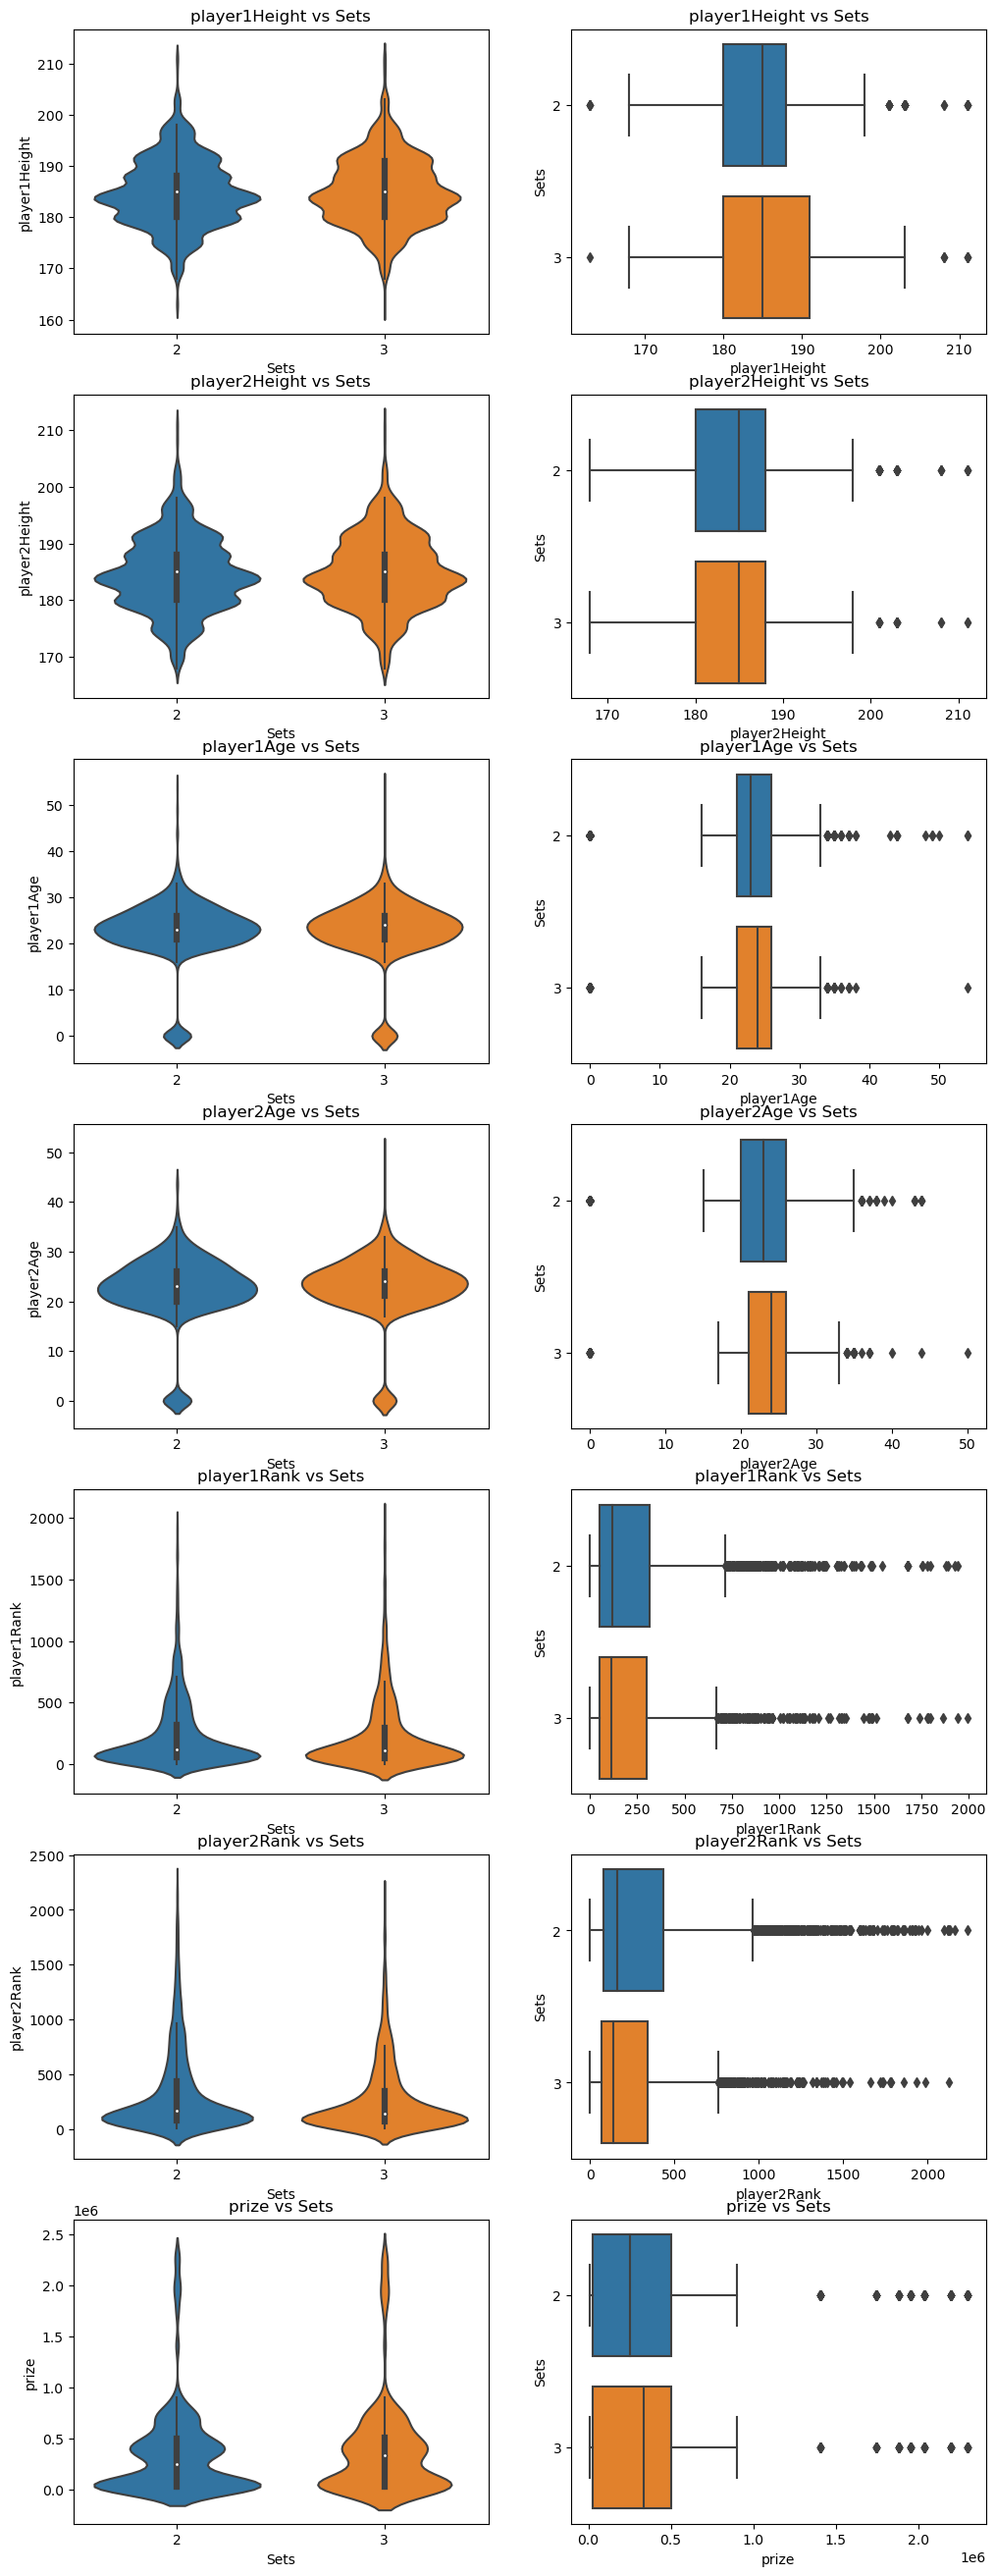

In [78]:
for i in range(len(numCols)):
    sns.boxplot(x=numCols[i], y=catCols[-1], orient='h', data=df, ax=axes[i][1])
    axes[i][1].set_title(f'{numCols[i]} vs {catCols[-1]}')
    sns.violinplot(y=numCols[i], x=catCols[-1], orient='v', data=df, ax=axes[i][0])
    axes[i][0].set_title(f'{numCols[i]} vs {catCols[-1]}')
fig

In [79]:
heights = [abs(height) for height in (df['player1Height'] - df['player2Height'])]

In [80]:
calculate_eta(df[catCols[-1]], np.array(heights))

0.008659669137001502

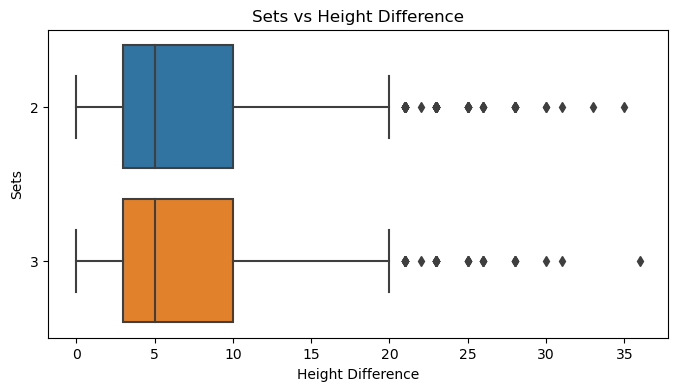

In [81]:
plt.figure(figsize=(8, 4))

sns.boxplot(y = df[catCols[-1]], x = heights, orient='h')

plt.title('Sets vs Height Difference')
plt.xlabel('Height Difference')
plt.show()

In [82]:
df.loc[(df['player1Age'] == 0) | (df['player2Age'] == 0),].shape

(514, 18)

In [83]:
ages = [abs(int(age)) for age in (df['player1Age'] - df['player2Age'])]

In [84]:
calculate_eta(df[catCols[-1]], np.array(ages))

0.008451021563672

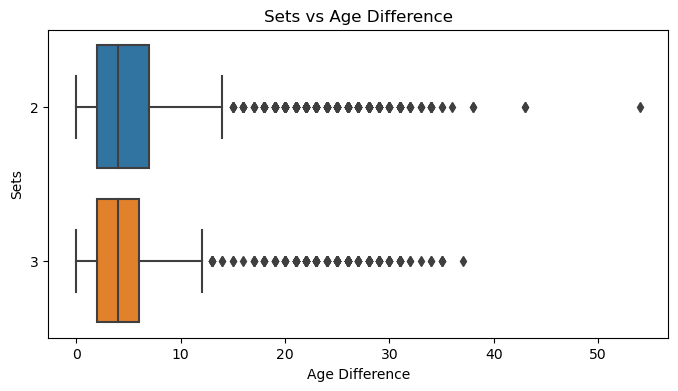

In [85]:
plt.figure(figsize=(8, 4))

sns.boxplot(y = df[catCols[-1]], x = ages, orient='h')

plt.title('Sets vs Age Difference')
plt.xlabel('Age Difference')
plt.show()

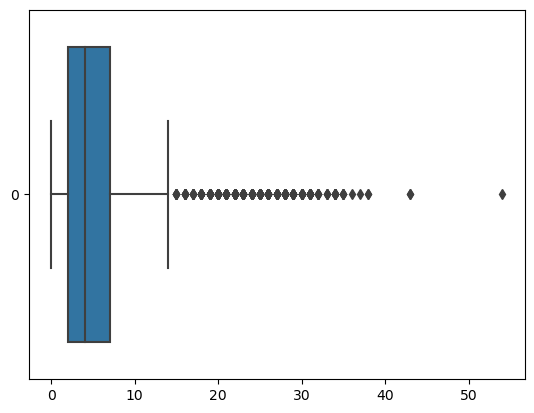

In [86]:
sns.boxplot(ages, orient='h')
plt.show()

In [87]:
ranks = [abs(rank) for rank in (df['player1Rank'] - df['player2Rank'])]

In [88]:
calculate_eta(df[catCols[-1]], np.array(ranks))

0.059702357472115435

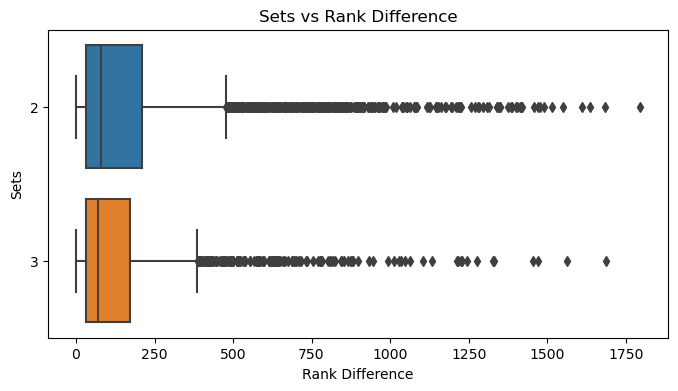

In [89]:
plt.figure(figsize=(8, 4))
sns.boxplot(y = df[catCols[-1]], x = ranks, orient='h')
plt.title('Sets vs Rank Difference')
plt.xlabel('Rank Difference')
plt.show()

Apesar de ser de uma forma muito ligeira, é possível verificar que o jogos com dois sets têm a tendência de serem aqueles onde a diferença entre as posições são relativamente altas. Dados os valores apresentados no gráfico, não parecem ser jogadores de extremos opostos, mas, também não estão sempre tão próximos assim nas sua posições. É possível que hajam jogadores de top 10 enfrentando jogadores de rank 300, por exemplo.

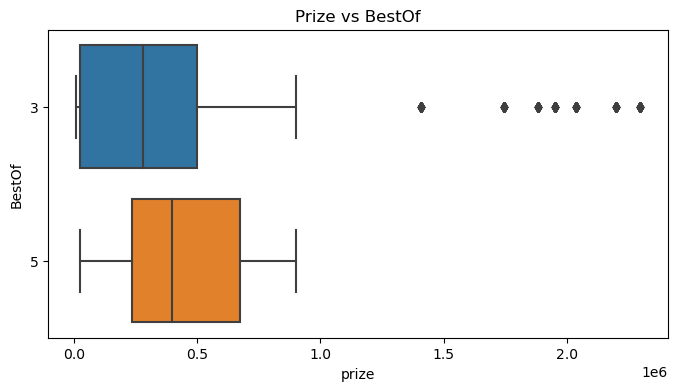

In [91]:
plt.figure(figsize=(8, 4))
sns.boxplot(y='BestOf', x='prize', orient='h', data=df2)
plt.title('Prize vs BestOf')
plt.show()

Uma outra curiosidade que surgiu e comprovou-se que em geral os torneios que são a melhor de 5 tendem a ter um prémio maior face aos torneios que são a melhor de 3.

### 2.2.3 Numérica vs Numérica

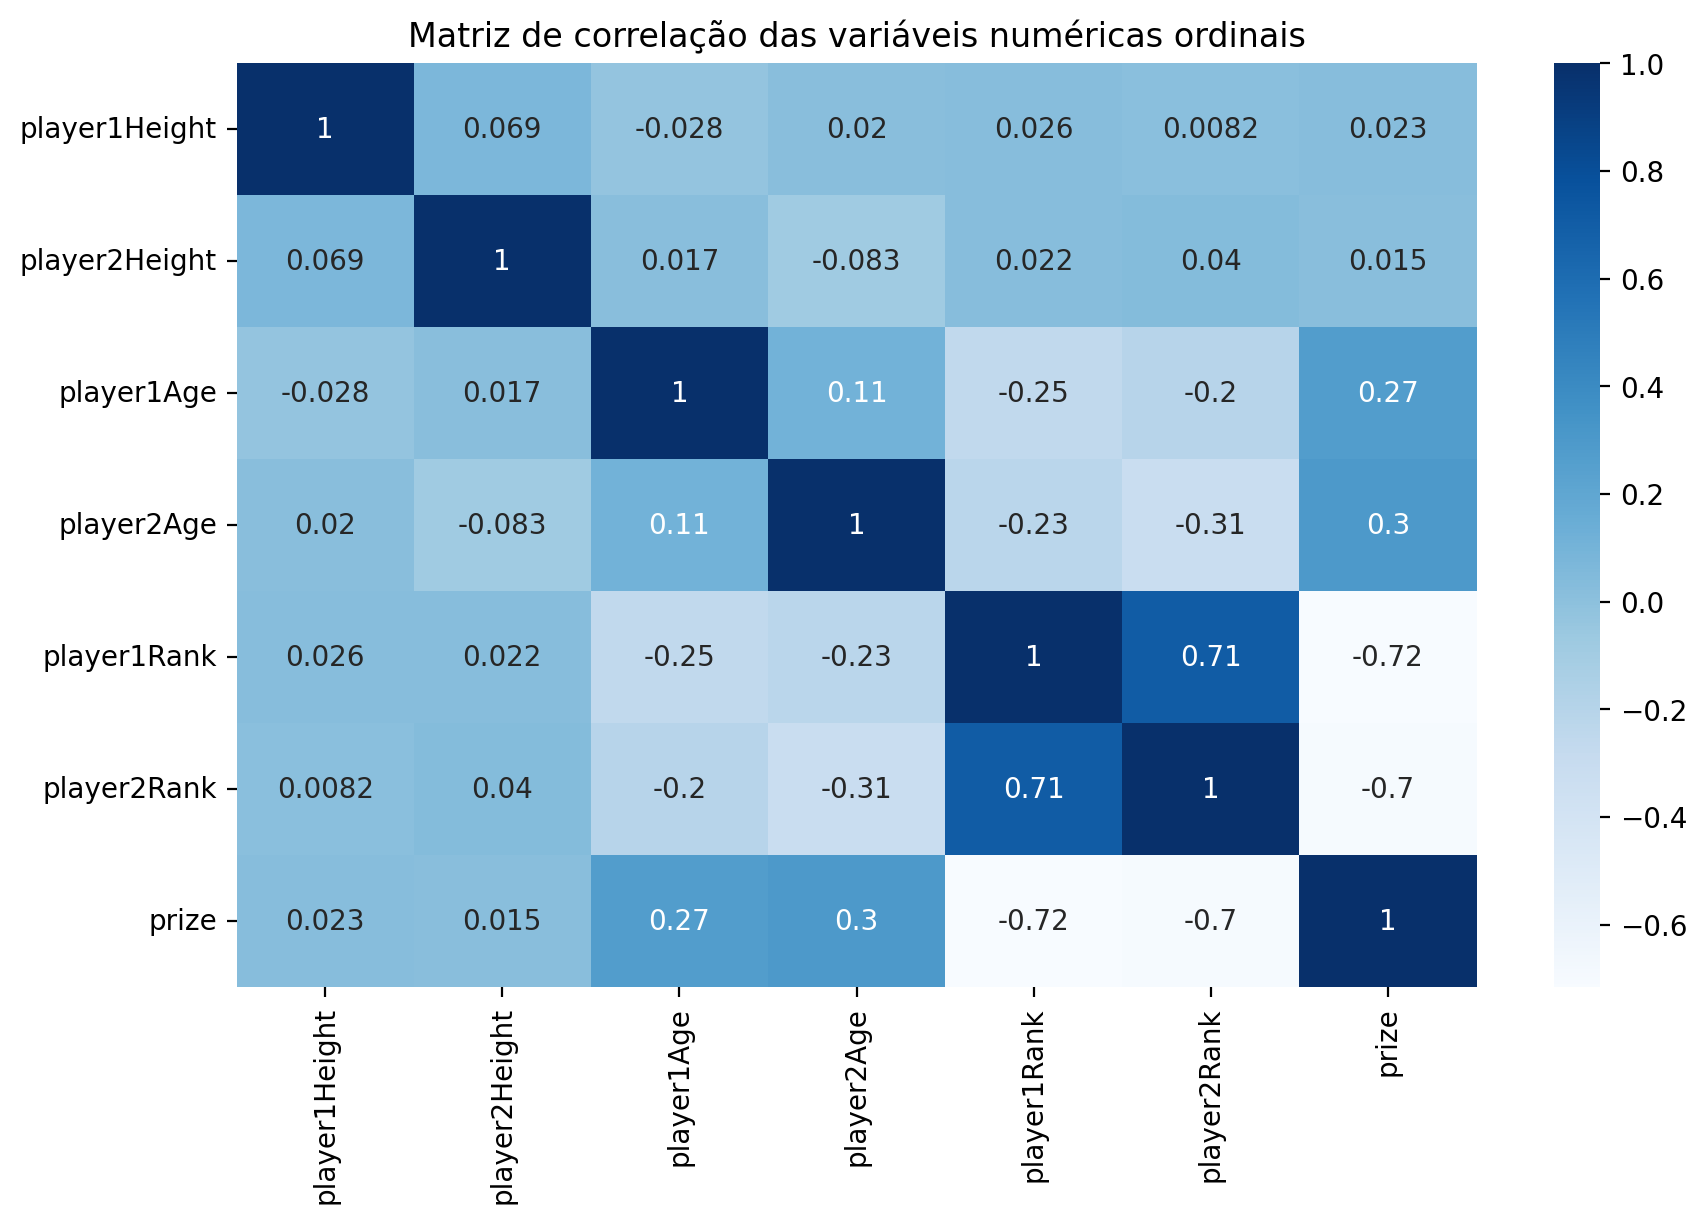

In [94]:
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(df[numCols].corr(numeric_only=True, method='spearman'), annot=True, cmap="Blues")
plt.title("Matriz de correlação das variáveis numéricas ordinais")
plt.show()

Ligando o observado no gráfico das diferenças de Rank verificado anteriormente, a correlação entre os ranks dos dois jogadores assume valores altos demonstrando que a tendência da ATP é de criar confrontos mais justos, ou seja, entre jogadores que tenham uma posição não muito diferente no rank da mesma organização.

# Data Preparation

In [97]:
df_copy = df.copy()

In [98]:
df_copy.columns

Index(['player1Height', 'player2Height', 'player1Hand', 'player2Hand',
       'player1Backhand', 'player2Backhand', 'player1Continent',
       'player2Continent', 'player1Age', 'player2Age', 'player1Rank',
       'player2Rank', 'GameRound', 'tournament', 'ground', 'Sets', 'Season',
       'prize'],
      dtype='object')

In [99]:
df_copy['Hands'] = hands
df_copy['Backhands'] = backhands
df_copy['Rank'] = ranks
df_copy['Ages'] = ages

In [100]:
df_copy.head()

player1Height  player2Height player1Hand player2Hand player1Backhand  \
0            185            185       Right       Right         Unknown   
1            180            178       Right       Right         Unknown   
2            188            180       Right       Right         Unknown   
3            188            193       Right       Right         Unknown   
4            188            191       Right       Right         Unknown   

  player2Backhand player1Continent player2Continent  player1Age  player2Age  \
0         Unknown    South America          Oceania        21.0        23.0   
1         Unknown           Europe             Asia        22.0        33.0   
2         Unknown           Europe    South America        23.0        21.0   
3         Unknown           Europe           Europe        23.0        22.0   
4         Unknown           Europe           Europe        23.0        18.0   

   ...       GameRound  tournament ground Sets  Season  prize  Hands  \
0  ...     Round of 32    Salzburg   Clay    3  Spring  75000  Right   
1  ...     Round of 32    Salzburg   Clay    3  Spring  75000  Right   
2  ...     Semi-Finals    Salzburg   Clay    2  Spring  75000  Right   
3  ...     Round of 32    Salzburg   Clay    3  Spring  75000  Right   
4  ...  Quarter-Finals    Salzburg   Clay    2  Spring  75000  Right   

   Backhands Rank Ages  
0    Unknown  119    2  
1    Unknown  194   11  
2    Unknown   20    2  
3    Unknown   15    1  
4    Unknown   13    5  

[5 rows x 22 columns]

In [101]:
df_copy.shape

(5206, 22)

In [102]:
df_copy.describe()['Ages']

count    5206.000000
mean        5.917787
std         7.081287
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        54.000000
Name: Ages, dtype: float64

In [103]:
df_copy.loc[(df_copy['player1Age'] == 0) | (df_copy['player2Age'] == 0)].shape

(514, 22)

In [104]:
df_copy = df_copy.loc[(df_copy['player1Age'] > 0) & (df_copy['player2Age'] > 0)]

In [105]:
df_copy.shape

(4692, 22)

In [106]:
df_copy.loc[df_copy['Ages'] > 12, ['player1Age', 'player2Age', 'Ages']].shape

(77, 3)

In [107]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4692 entries, 0 to 5249
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   player1Height     4692 non-null   int64   
 1   player2Height     4692 non-null   int64   
 2   player1Hand       4692 non-null   object  
 3   player2Hand       4692 non-null   object  
 4   player1Backhand   4692 non-null   object  
 5   player2Backhand   4692 non-null   object  
 6   player1Continent  4692 non-null   object  
 7   player2Continent  4692 non-null   object  
 8   player1Age        4692 non-null   float64 
 9   player2Age        4692 non-null   float64 
 10  player1Rank       4692 non-null   int64   
 11  player2Rank       4692 non-null   int64   
 12  GameRound         4692 non-null   category
 13  tournament        4692 non-null   object  
 14  ground            4692 non-null   object  
 15  Sets              4692 non-null   int64   
 16  Season            4692 n

In [108]:
df_copy = df_copy.drop([
    'player1Height', 'player2Height', 'player1Hand', 'player2Hand', 
    'player1Backhand', 'player2Backhand', 'player1Continent', 'player2Continent',
    'player1Age', 'player2Age', 'player1Rank', 'player2Rank', 'tournament'
], axis=1)

In [109]:
rows, cols = df_copy.shape
print(f"Linhas: {rows}")
print(f"Colunas: {cols}")

Linhas: 4692
Colunas: 9


In [110]:
df_copy.columns

Index(['GameRound', 'ground', 'Sets', 'Season', 'prize', 'Hands', 'Backhands',
       'Rank', 'Ages'],
      dtype='object')

#### Resolvendo o problema dos unknowns em Backhands

In [112]:
df_copy['Backhands2'] = df_copy['Backhands']

In [113]:
df_copy.loc[df_copy['Backhands2'] == 'One - Unknown', 'Backhands'] = 'One'

In [114]:
df_copy.loc[(df_copy['Backhands2'] == 'Unknown') | (df_copy['Backhands2'] == 'Two - Unknown'), 'Backhands'] = 'Two'

- Os registos com `Backhand='One - Unknown'` foram atualizados para `'One'` por ser a classe modal para os registos com `'One'`;
- Os restantes registos com `Unknown` foram atualizados para `'Two'` por ser a classe modal geral e pelo mesmo motivo da atualização anterior.

In [116]:
df_copy['Backhands'].value_counts()

Two          3088
One          1167
One - Two     437
Name: Backhands, dtype: int64

In [117]:
df_copy = df_copy.drop('Backhands2', axis=1)

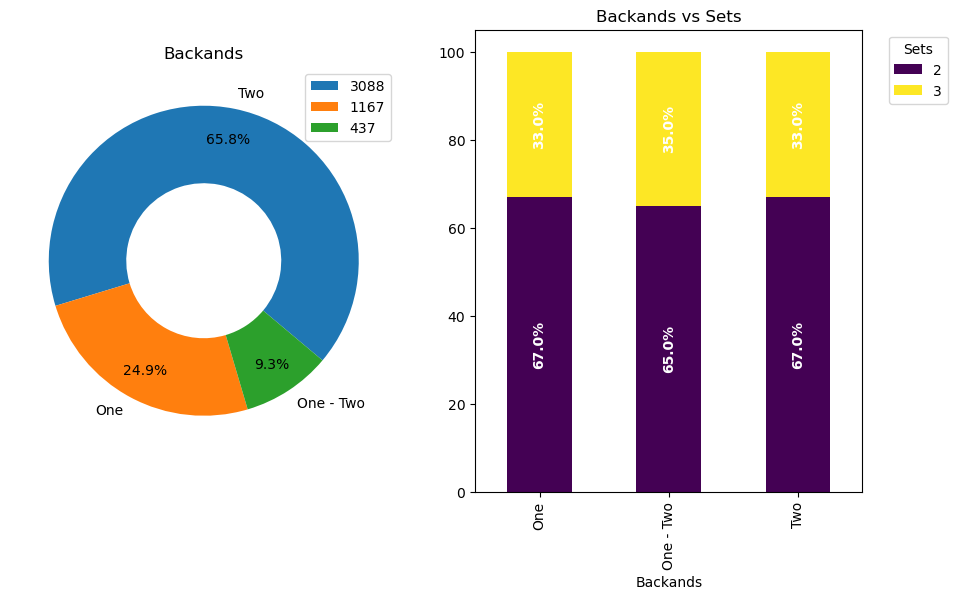

In [118]:
stackpieplot(df_copy['Backhands'], 'Backands', df_copy['Sets'])

In [119]:
round(pd.crosstab(df_copy['Backhands'], df_copy[catCols[-1]], normalize='index'), 2)

Sets          2     3
Backhands            
One        0.67  0.33
One - Two  0.65  0.35
Two        0.67  0.33

#### Resolvendo o problema da subrepresentação da classe Left em relação as restantes, unindo-a a Right

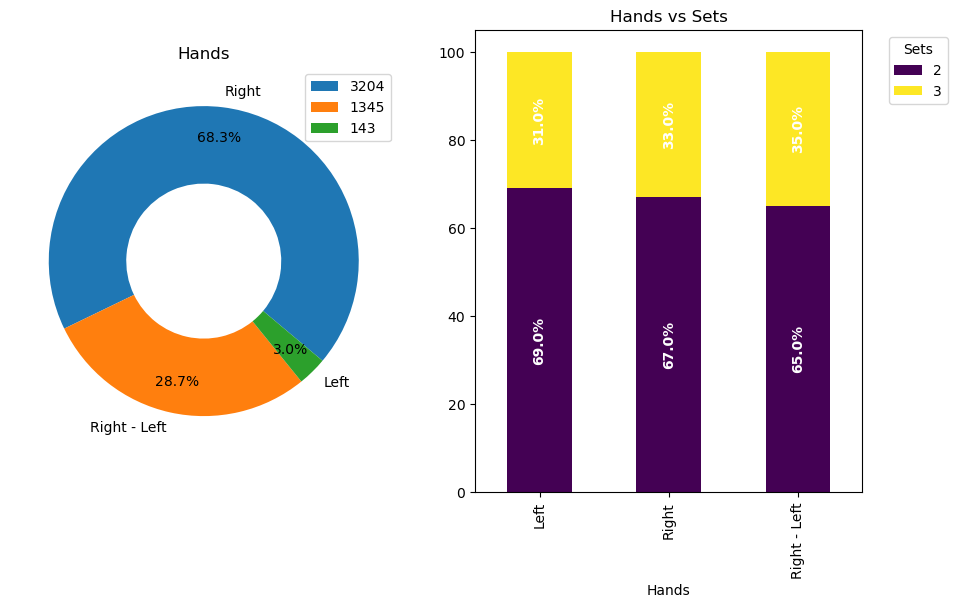

In [121]:
stackpieplot(df_copy['Hands'], 'Hands', df_copy['Sets'])

In [122]:
round(pd.crosstab(df_copy['Hands'], df_copy[catCols[-1]], normalize='index'), 2)

Sets             2     3
Hands                   
Left          0.69  0.31
Right         0.67  0.33
Right - Left  0.65  0.35

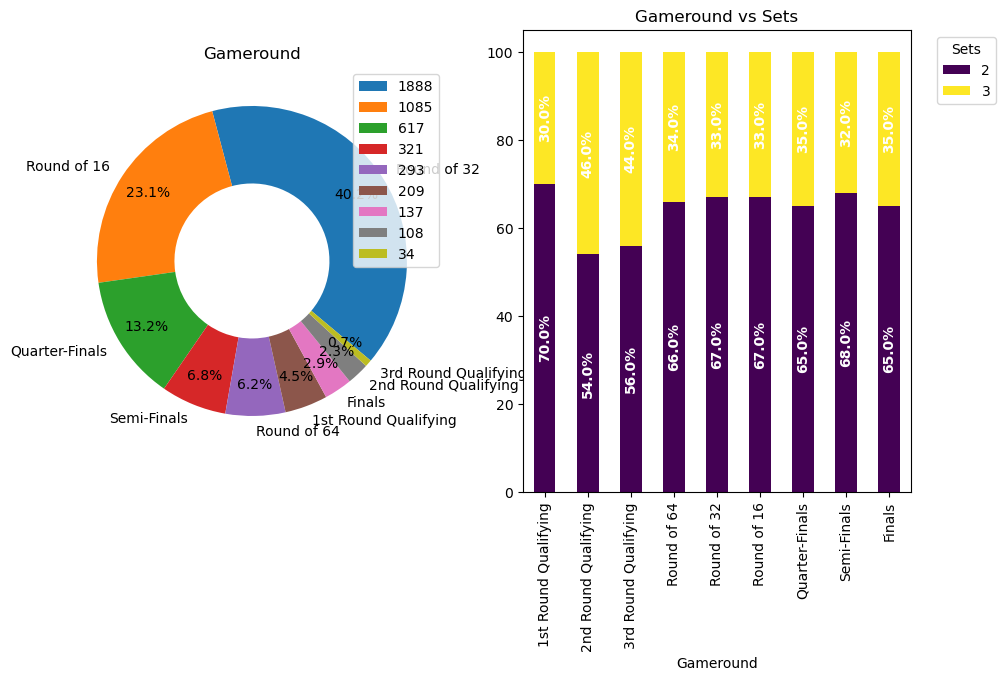

In [123]:
stackpieplot(df_copy['GameRound'], 'GameRound', df_copy['Sets'])

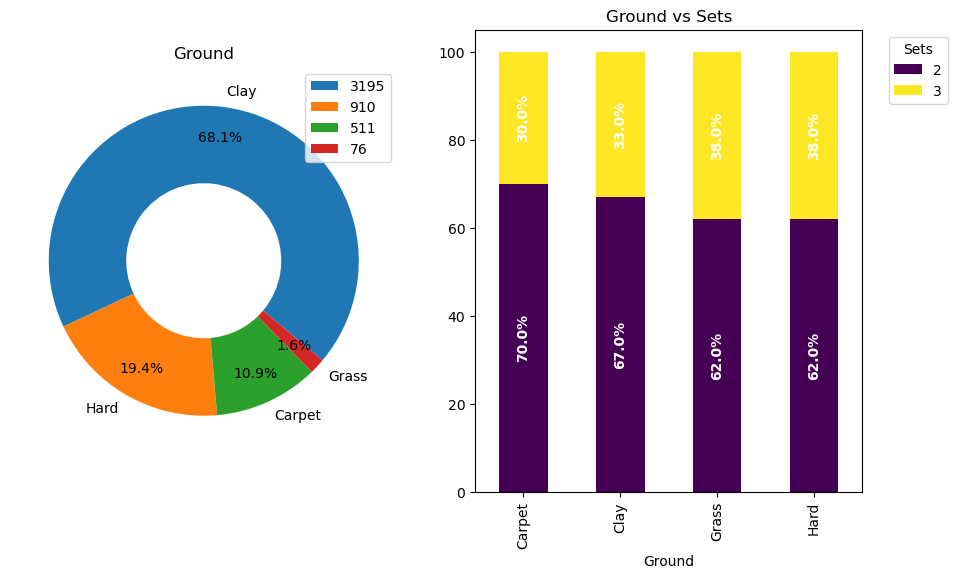

In [124]:
stackpieplot(df_copy['ground'], 'Ground', df_copy['Sets'])

#### Resolvendo o problema dos outliers em ranks

In [126]:
IQR = (df_copy['Rank'].quantile(0.75) - df_copy['Rank'].quantile(0.25))
outlier = int(df_copy['Rank'].quantile(0.75) + (IQR * 1.5))
outlier

434

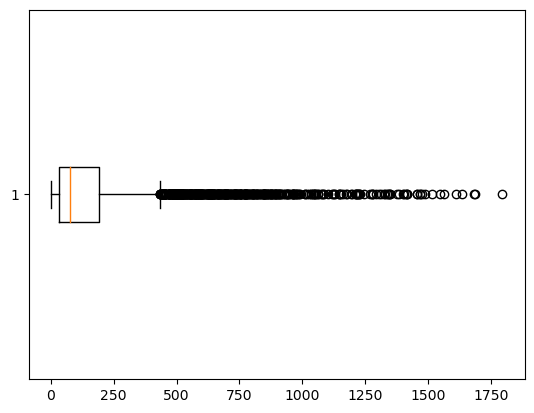

In [127]:
# Before handling
plt.boxplot(df_copy['Rank'], vert=False)
plt.show()

In [128]:
# Handling
df_copy.loc[df_copy['Rank'] > outlier, 'Rank'] = outlier

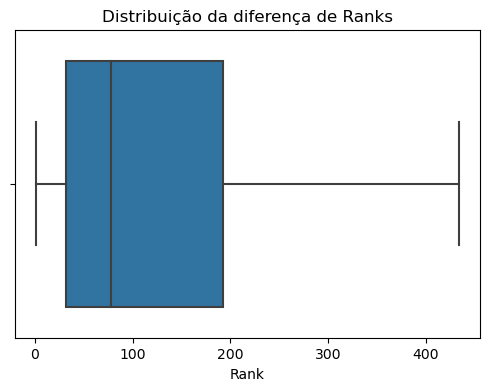

In [129]:
# After handling
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_copy['Rank'], orient='h')
plt.title("Distribuição da diferença de Ranks")
plt.show()

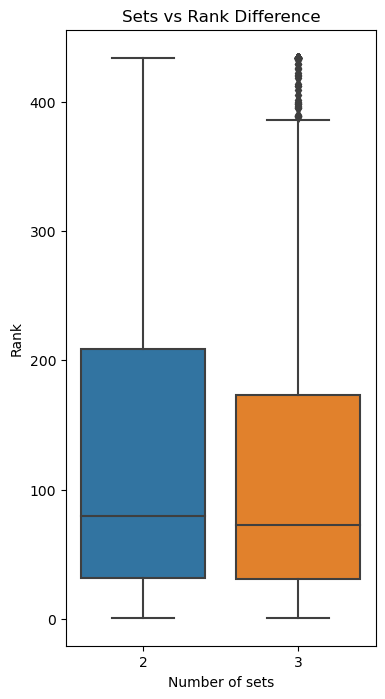

In [130]:
plt.figure(figsize=(4, 8))
sns.boxplot(x = df_copy['Sets'], y = df_copy['Rank'], orient='v')
plt.title('Sets vs Rank Difference')
plt.xlabel('Number of sets')
plt.show()

In [131]:
outlier = df_copy.Ages.quantile(0.75) + 1.5 * (df_copy.Ages.quantile(0.75) - df_copy.Ages.quantile(0.25))
outlier

12.0

In [132]:
df_copy.loc[df_copy['Ages'] >= outlier, 'Ages'] = outlier

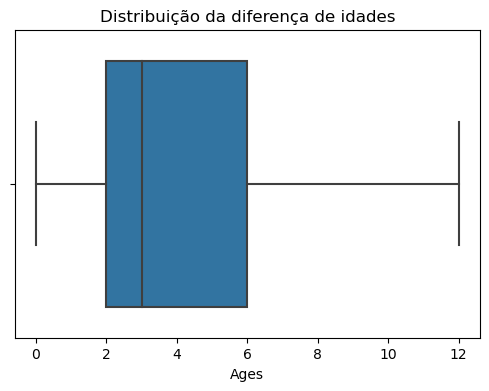

In [133]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_copy.Ages, orient='h')
plt.title("Distribuição da diferença de idades")
plt.show()

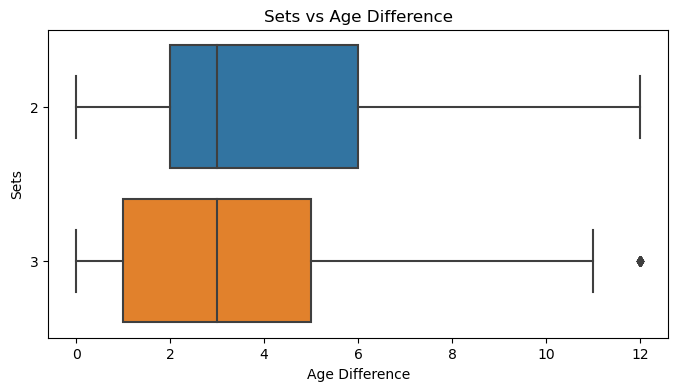

In [134]:
plt.figure(figsize=(8, 4))

sns.boxplot(y='Sets', x='Ages', data=df_copy, orient='h')

plt.title('Sets vs Age Difference')
plt.xlabel('Age Difference')
plt.show()

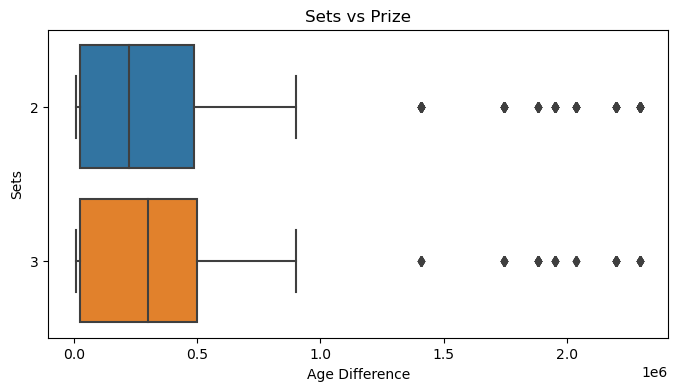

In [135]:
plt.figure(figsize=(8, 4))

sns.boxplot(y='Sets', x='prize', data=df_copy, orient='h')

plt.title('Sets vs Prize')
plt.xlabel('Age Difference')
plt.show()

In [136]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4692 entries, 0 to 5249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GameRound  4692 non-null   category
 1   ground     4692 non-null   object  
 2   Sets       4692 non-null   int64   
 3   Season     4692 non-null   object  
 4   prize      4692 non-null   int64   
 5   Hands      4692 non-null   object  
 6   Backhands  4692 non-null   object  
 7   Rank       4692 non-null   int64   
 8   Ages       4692 non-null   int64   
dtypes: category(1), int64(4), object(4)
memory usage: 334.9+ KB


In [137]:
df_copy.head()

GameRound ground  Sets  Season  prize  Hands Backhands  Rank  Ages
0     Round of 32   Clay     3  Spring  75000  Right       Two   119     2
1     Round of 32   Clay     3  Spring  75000  Right       Two   194    11
2     Semi-Finals   Clay     2  Spring  75000  Right       Two    20     2
3     Round of 32   Clay     3  Spring  75000  Right       Two    15     1
4  Quarter-Finals   Clay     2  Spring  75000  Right       Two    13     5

In [138]:
df_copy = df_copy[['GameRound', 'ground', 'Hands', 'Backhands', 'Season', 'Ages', 'prize', 'Rank', 'Sets']]

In [139]:
df_copy.to_csv('atpplayers.csv', index=False)

In [140]:
num_cols = ['Ages', 'prize', 'Rank']
cat_cols = ['GameRound', 'ground', 'Hands', 'Backhands', 'Season', 'Sets']

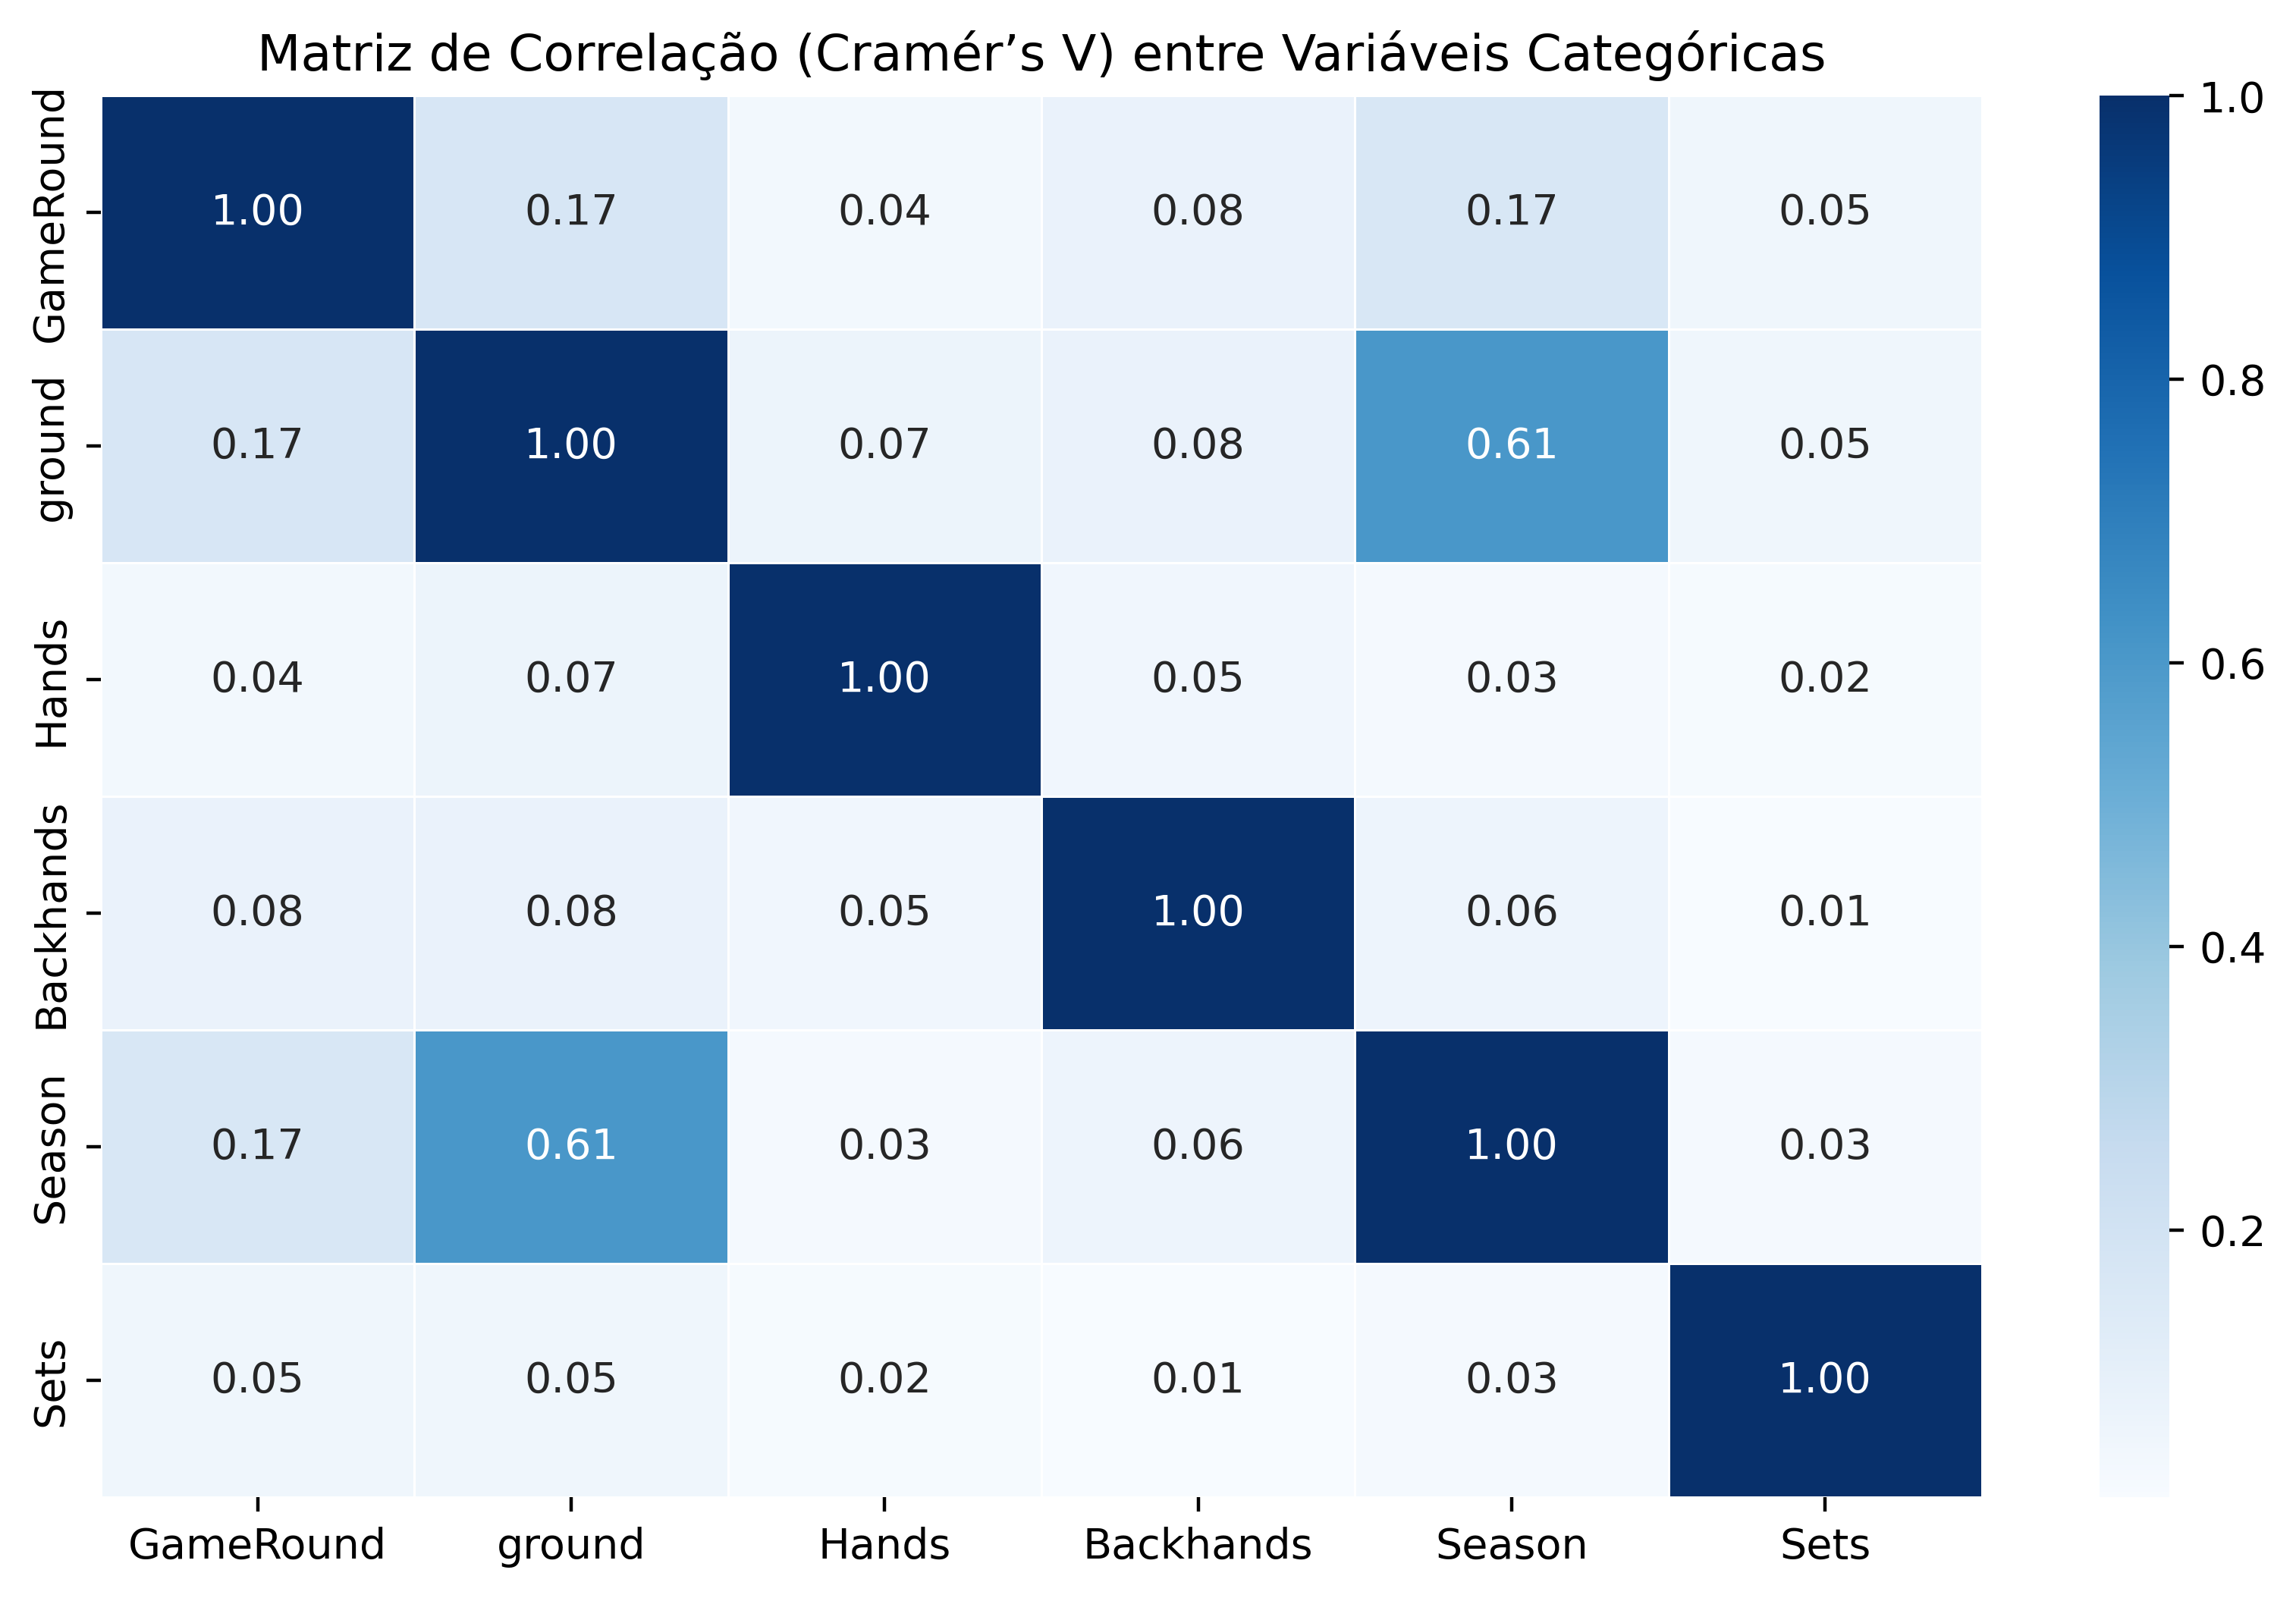

In [141]:
correlation_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for var1 in cat_cols:
    for var2 in cat_cols:
        if var1 == var2:
            correlation_matrix.loc[var1, var2] = 1.0
        else:
            correlation_matrix.loc[var1, var2] = cramers_v(df_copy[var1], df_copy[var2])

# Converter para float para evitar problemas com Seaborn
correlation_matrix = correlation_matrix.astype(float)

# Plotar heatmap de correlação categórica
plt.figure(figsize=(10, 6), dpi=400)
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação (Cramér’s V) entre Variáveis Categóricas")
plt.show()

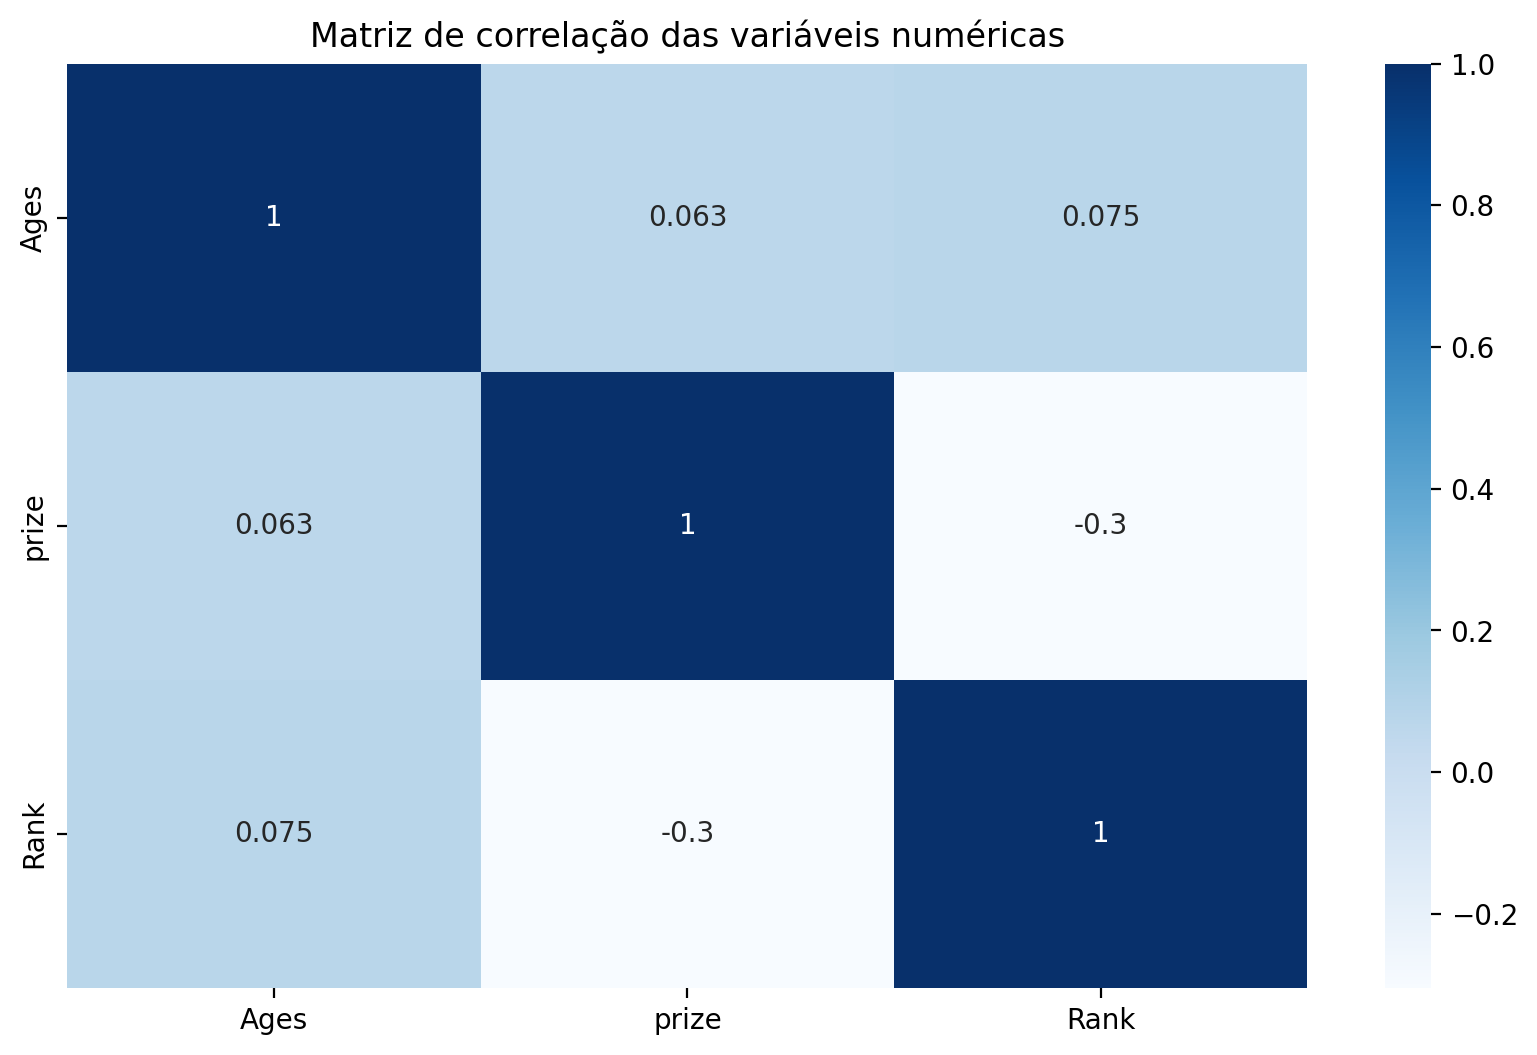

In [142]:
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(df_copy[num_cols].corr(numeric_only=True, method='pearson'), annot=True, cmap="Blues")
plt.title("Matriz de correlação das variáveis numéricas")
plt.show()

In [143]:
# Calcular ETA para cada variável numérica
eta = list()
for i in range(len(num_cols)):
    eta.append(calculate_eta(df_copy['Sets'], df_copy[num_cols[i]]))

# Criar um DataFrame com os resultados
resultados = pd.DataFrame({
    'Variável': num_cols,
    'Sets': eta
})

print("Coeficientes ETA:")
print(resultados)

Coeficientes ETA:
  Variável      Sets
0     Ages  0.034361
1    prize  0.026000
2     Rank  0.044483


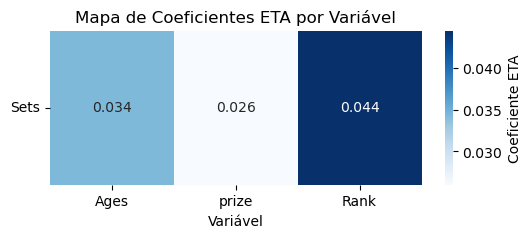

In [144]:
resultados.set_index('Variável', inplace=True)

# Criar um "mapa de calor" unidimensional
plt.figure(figsize=(6, 2))
sns.heatmap(resultados.T, annot=True, cmap='Blues', cbar_kws={'label': 'Coeficiente ETA'})
plt.title('Mapa de Coeficientes ETA por Variável')
plt.yticks(rotation=0)
plt.show()

In [145]:
df_copy['Sets'].value_counts()

2    3125
3    1567
Name: Sets, dtype: int64

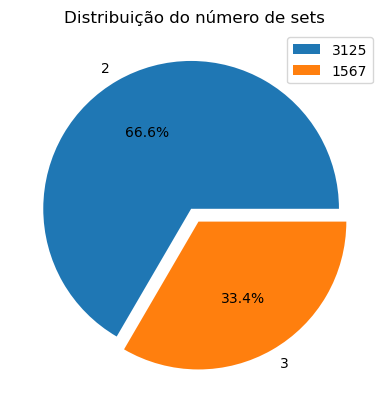

In [146]:
values = df_copy['Sets'].value_counts().values
keys = df_copy['Sets'].value_counts().keys()
explodes = [0.05 for i in range(len(keys))]

plt.pie(x=values, labels=keys, autopct='%1.1f%%', explode=explodes)
plt.title("Distribuição do número de sets")
plt.legend(values)
plt.show()